## SPRINT PROJECT 2

## 1 Transformación de Datos

### 1.0 Elección de las transformaciones de datos a realizar. Justificación.

De acuerdo a las características del dataset, los tipos de datos que posee y las condiciones de dichos datos en cuanto a los valores faltantes y outliers, se consideran las siguientes transformaciones como algunas de las más trascendentes para realizar y obtener así un dataset apropiado para ser sometido a modelos de ML:



*   Detección y eliminación de Outliers
*   Imputación de valores faltantes
*   Escalado de Datos

**Justificación**.

**Detección y eliminación de Outliers**. En el presente caso el dataset de properati contiene datos de una diversidad importante de tipos de inmuebles, rangos de superficie, características de las viviendas, etc. A su vez, cada una de estas características puede estar tomando valores que, aun siendo verosímiles, generen una dispersión de los datos que sea difícil de manejar por un modelo de machine learning.

Por este motivo, y para los casos en que por error u otro motivo las variables tomen valores sin sentido práctico o que manifiesten ser valores erróneos, se debe conocer estadísticamente el dataset y mediante la identificación previa de Outliers, se procede a la eliminación de los mismos.

Eliminar Outliers es conveniente para la reducción de la dispersión de datos, lo cual ayudará a un mejor ajuste del modelo de machine learning.

**Imputación de valores faltantes**. Los modelos de machine learning se "alimentan" de datos. Los datos corresponden a diferentes variables o features que a su vez contribuyen con mayor o menor influencia para la predicción de la variable de interés (precio en este caso).

Al realizar el análisis exploratorio de datos se puede advertir sobre valores faltantes en ciertas variables que eventualmente serán de gran influencia para la predicción deseada. En estos casos no se puede descartar porciones considerables del dataset simplemente porque no se disponga de ese grupo de datos. Se debe considerar entonces el tipo de variables con datos faltantes para la implementación apropiada de relleno de datos.

Esto contribuirá en disponer de más cantidad de datos en variables que tengan un peso considerable para el modelo, y aun será útil realizarlo con datos faltantes en el proceso de investigación de las variables y su importancia.

**Escalado de Datos**. Los modelos de machine learning necesitan que los valores que toman las distintas variables del dataset guarden cierta relación en cuanto a sus valores absolutos. Así entonces, no será lo mismo que un inmueble con features como baños, dormitorios y ambientes, que toman valores que van de 0 a menos de 6 o 7 para la inmensa mayoría de los casos, sea combinado con features como superficie total que toma rangos de cientos de metros cuadrados. Ese tipo de diferencias de orden de magnitud entre los features ocasiona un menor desempeño de un modelo.

### 1.1 Importación de librerías y dataset.

In [73]:
# Importación de librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sprint Project 2/DS_Proyecto_01_Datos_Properati.csv')

In [3]:
data.shape

(146660, 19)

In [4]:
data.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


### 1.2 Evaluación de columnas o features de poca o ninguna relevancia para el presente trabajo.

In [5]:
# Se eliminan las columnas que no aportana la solución de los modelos requeridos

data_drop = data.drop(columns= ['start_date', 'end_date', 'created_on', 'l1', 'currency', 'title', 'description', 'operation_type'])
data_drop.shape

(146660, 11)

Antes de pasar a identificar outliers para el subsiguiente filtrado del dataset, evaluamos los datos faltantes para considerar posibilidades de relleno de datos y posterior procesamiento.
Se decide esta metodología porque a posteriori de realizado el filtrado, solo se aprecian valores faltantes en columnas 'lat' y 'lon', por lo tanto hay un proceso de relleno de valores faltantes que se hará a continuación- a modo de práctica.

Identificación, evaluación y relleno de valores faltantes en el dataset sin filtrar.

In [6]:
data_drop.isna().sum()

lat                 9925
lon                 9959
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64

In [7]:
# Se intenta completar las columnas surface_total y surface_covered entre sí, por tratarse de variables que muestran una correlación muy similar con precios:

df = data_drop
df.surface_covered.fillna(df.surface_total, inplace=True)
df.surface_total.fillna(df.surface_covered, inplace=True)

In [8]:
df.isna().sum()

lat                 9925
lon                 9959
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20012
surface_covered    20012
price                  0
property_type          0
dtype: int64

Se continua el proceso de rellenar nulos en columnas surface_covered y surface_total, obteniendo la mediana de estos atributos para cada tipo de propiedad

In [9]:
median_surface = df[['surface_total', 'property_type']].groupby('property_type').agg('median')
median_surface.to_dict()

{'surface_total': {'Casa': 300.0,
  'Casa de campo': 2462.0,
  'Cochera': 13.5,
  'Departamento': 67.0,
  'Depósito': 480.0,
  'Local comercial': 106.5,
  'Lote': 520.0,
  'Oficina': 65.0,
  'Otro': 678.0,
  'PH': 105.0}}

Se explora ahora los valores de surface_total para tipo de propiedad, cochera:

In [10]:
df_cochera = df.loc[(df['property_type']== 'Cochera'), ['surface_total']]
df_cochera.shape

(259, 1)

Para el presente filtrado, encontramos que las Cocheras no tienen valores de superficie.

Ahora, se rellena valores faltantes de columna surface_total:

In [11]:
# Se define la columna 'property_type' como índice, para rellenar valores de 'surface_total' con la media para cada tipo de propiedad:
df1 = df.set_index('property_type')

# Se rellenan vacíos con la media de surface_total:
df1.surface_total.fillna(value= median_surface.to_dict()['surface_total'], axis=0, inplace=True)
print(df1.surface_total.isna().sum())
df1.head(3)

0


,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
property_type,,,,,,,,,,
Departamento,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0
PH,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
PH,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0


In [12]:
# Se restablece el índice del dataset:
df1.reset_index(inplace=True)
df1.head()

,property_type,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Departamento,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0
1,PH,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
2,PH,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
3,PH,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
4,PH,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0


Al haber completado los valores faltantes de surface_total y surface_covered entre sí, y haber luego completado los valores faltantes de surface_total con la mediana correspondiente a cada tipo de propiedad, se procede a eliminar la columna surface_covered.

In [13]:
df1.drop(columns= ['surface_covered'])

,property_type,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,price
0,Departamento,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,153000.0
1,PH,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,159000.0
2,PH,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,125000.0
3,PH,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,295000.0
4,PH,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,40000.0
...,...,...,...,...,...,...,...,...,...,...
146655,Departamento,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,165000.0
146656,Departamento,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,130000.0
146657,Departamento,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,73000.0
146658,Departamento,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,68000.0


------------------------------------------------------

Se procede ahora a rellenar las instancias con nulos en latitud y longitud. Para eso, primero se determina el valor medio de latitud y longitud para cada barrio especificado en columna 'l3'.

In [14]:
mean_lat = df1[['lat', 'l3']].groupby('l3').agg('mean')
mean_lat.to_dict()

{'lat': {'Abasto': -34.60418364477533,
  'Agronomía': -34.59383278247622,
  'Almagro': -34.60569031782249,
  'Almirante Brown': -34.81390853154354,
  'Avellaneda': -34.683031955520576,
  'Balvanera': -34.6099995929331,
  'Barracas': -34.63858019814034,
  'Barrio Norte': -34.5930107131,
  'Belgrano': -34.56304086677157,
  'Berazategui': -34.79272345338899,
  'Boca': -34.633467764465045,
  'Boedo': -34.627854887824974,
  'Caballito': -34.61721237923586,
  'Catalinas': -34.59805989816,
  'Cañuelas': -35.03218835459238,
  'Centro / Microcentro': -34.603797504280614,
  'Chacarita': -34.58861086239027,
  'Coghlan': -34.56172522749897,
  'Colegiales': -34.576678088782934,
  'Congreso': -34.609033048776055,
  'Constitución': -34.625409629737234,
  'Escobar': -34.367954180479124,
  'Esteban Echeverría': -34.842588901315764,
  'Ezeiza': -34.88796877217963,
  'Florencio Varela': -34.81296846595475,
  'Flores': -34.6287851652036,
  'Floresta': -34.631310032055694,
  'General Rodríguez': -34.612983

In [15]:
mean_lon = df1[['lon', 'l3']].groupby('l3').agg('mean')
mean_lon.to_dict()

{'lon': {'Abasto': -58.41269006933407,
  'Agronomía': -58.489832299382925,
  'Almagro': -58.42155349962489,
  'Almirante Brown': -58.38783034037151,
  'Avellaneda': -58.34565017123508,
  'Balvanera': -58.40309461144975,
  'Barracas': -58.3755583211718,
  'Barrio Norte': -58.40337959276105,
  'Belgrano': -58.45316456193324,
  'Berazategui': -58.190204292685166,
  'Boca': -58.36335034213783,
  'Boedo': -58.41783249555687,
  'Caballito': -58.44221640345963,
  'Catalinas': -58.37181111408,
  'Cañuelas': -58.723879456992385,
  'Centro / Microcentro': -58.38090630064971,
  'Chacarita': -58.450048068577836,
  'Coghlan': -58.47411257967617,
  'Colegiales': -58.45174586871536,
  'Congreso': -58.39515813643188,
  'Constitución': -58.38530164030957,
  'Escobar': -58.771722003896016,
  'Esteban Echeverría': -58.477599028345125,
  'Ezeiza': -58.527373959014774,
  'Florencio Varela': -58.26288235033723,
  'Flores': -58.462927084695295,
  'Floresta': -58.48385387820884,
  'General Rodríguez': -58.942

Para rellenar faltantes de lat y lon, se sigue el mismo procedimiento que el realizado para surface_total. Se define la columna 'l3' (barrios) como índice, para luego rellenar 'lat' y 'lon' con valores medios.

In [16]:
# Se define la columna 'l3' como índice del dataset:

df_lat = df1.set_index('l3')

# Se rellenan valores de latitud según la media de cada barrio:

df_lat.lat.fillna(value= mean_lat.to_dict()['lat'], axis=0, inplace=True)
print(df_lat.lat.isna().sum())

0


In [17]:
df_lon = df_lat
#df_lon = df_lat.set_index('l3')

# Se rellenan valores de latitud según la media de cada barrio:

df_lon.lon.fillna(value= mean_lon.to_dict()['lon'], axis=0, inplace=True)
print(df_lon.lon.isna().sum())

0


In [18]:
# Se restablece el índice del dataset:

df_lon.reset_index(inplace=True)
df_lon.head(3)

,l3,property_type,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,San Cristobal,Departamento,-34.605880,-58.384949,Capital Federal,7.0,7.0,2.0,140.0,140.0,153000.0
1,Boedo,PH,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0
2,Palermo,PH,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0


Luego de los rellenos realizados en columnas 'surface_total', 'lat' y 'lon', verificamos nuevamente cuales son los nulos remanentes del dataset resultante.

In [19]:
df2 = df_lon
df3 = df2.drop(columns= ['surface_covered'])
df3.isna().sum()

l3                  0
property_type       0
lat                 0
lon                 0
l2                  0
rooms               0
bedrooms            0
bathrooms        5957
surface_total       0
price               0
dtype: int64

Se evalúa a continuación la correlación de la variable bathrooms con el resto de las variables, para identificar con cual de ellas se hay una mejor relación.

In [20]:
df3.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,price
lat,1.000000,-0.973757,-0.011029,0.007996,0.023988,-0.003912,0.014728
lon,-0.973757,1.000000,-0.007006,-0.017483,-0.032026,-0.014291,0.009081
rooms,-0.011029,-0.007006,1.000000,0.869769,0.613308,0.078071,0.351025
bedrooms,0.007996,-0.017483,0.869769,1.000000,0.588527,0.073145,0.316192
bathrooms,0.023988,-0.032026,0.613308,0.588527,1.000000,0.059035,0.556861
surface_total,-0.003912,-0.014291,0.078071,0.073145,0.059035,1.000000,0.037199
price,0.014728,0.009081,0.351025,0.316192,0.556861,0.037199,1.000000


La tabla de correlación de arriba muestra que los baños varían con mayor correlación con la cantidad de ambientes ('rooms').

-----------------------------------------------------------

Nos disponemos ahora a calcular la media de cantidad de baños según una agrupación por cantidad de ambientes (rooms).

NOTA: se entiende que la cantidad de baños en cualquier caso debe ser un entero, pero a los fines de completar los espacios nulos, un float resulta representativo.

In [21]:
mean_bath = df3[['bathrooms', 'rooms']].groupby('rooms').agg('mean')
mean_bath.to_dict()

{'bathrooms': {1.0: 1.0341391400627422,
  2.0: 1.1093858863342292,
  3.0: 1.4508164807731947,
  4.0: 2.047845384964876,
  5.0: 2.502052384675528,
  6.0: 2.764181322764429,
  7.0: 3.1523754345307067,
  8.0: 3.371571072319202,
  9.0: 3.801762114537445,
  10.0: 4.082926829268293,
  11.0: 3.4565217391304346,
  12.0: 4.096153846153846,
  13.0: 6.166666666666667,
  14.0: 5.083333333333333,
  15.0: 6.5,
  16.0: 4.0,
  18.0: 3.6,
  20.0: 8.714285714285714,
  21.0: 1.0,
  24.0: 2.0,
  25.0: 10.0,
  26.0: 7.0,
  30.0: 8.0,
  32.0: 1.0,
  35.0: 1.0}}

In [22]:
# Se designa la variable rooms como índice del dataset:

df3 = df3.set_index('rooms')

# Se rellenan los valores faltantes de baños con la media obtenida para las distintas cantidades de ambientes:

df3.bathrooms.fillna(value= mean_bath.to_dict()['bathrooms'], axis=0, inplace=True)
df3.reset_index(inplace=True)
df3.shape

(146660, 10)

In [23]:
df3.isna().sum()

rooms            0
l3               0
property_type    0
lat              0
lon              0
l2               0
bedrooms         0
bathrooms        0
surface_total    0
price            0
dtype: int64

Como no tiene sentido la porción decimal de baños, se redondea al entero:

In [24]:
df3['bathrooms'].round(decimals=0)
df3.head()

,rooms,l3,property_type,lat,lon,l2,bedrooms,bathrooms,surface_total,price
0,7.0,San Cristobal,Departamento,-34.605880,-58.384949,Capital Federal,7.0,2.0,140.0,153000.0
1,2.0,Boedo,PH,-34.624056,-58.412110,Capital Federal,1.0,2.0,70.0,159000.0
2,2.0,Palermo,PH,-34.593569,-58.427474,Capital Federal,1.0,1.0,45.0,125000.0
3,2.0,Palermo,PH,-34.581294,-58.436754,Capital Federal,1.0,1.0,85.0,295000.0
4,2.0,La Plata,PH,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,1.0,1.0,50.0,40000.0


In [25]:
df3.columns

Index(['rooms', 'l3', 'property_type', 'lat', 'lon', 'l2', 'bedrooms',
       'bathrooms', 'surface_total', 'price'],
      dtype='object')

El hecho de haber calculado promedio de 'lat' y 'lon' para cada barrio, torna las columnas 'l3' y 'l2' innecesarias.

Se eliminan a continuación las columnas mencionadas:

In [26]:
df4 = df3.drop(columns= ['l2', 'l3'])
df4.columns
df4.shape

(146660, 8)

In [27]:
#df5= df4.loc[df4['property_type']== 'Cochera'].drop
#df4_dropna = df4.dropna(axis=0, subset=['surface_total'])
#print(df4_dropna.shape)
#df4_dropna.isna().sum()

### 1.3 Valores atípicos y outliers

Se calcula percentilos, Z-score y rangos intercuartílicos para determinar los outliers.

Comenzando con la columna 'rooms':

In [28]:
#Buscamos los límites de las variables rooms, bedrooms, bathrooms, surface_total, surface_covered y price, para acotar sus valores en el análisis.

#Evaluando los límites para variable rooms:
print('Evaluando los percentilos de rooms')
df = data_drop
columna = 'rooms'
print(df[columna].describe(percentiles=[0.1,0.9]))

#Evaluando límites según Z-score:
print("""

Evaluando los límites según Z-score: """)
maximo = np.round(df[columna].mean() + 3*df[columna].std(), decimals=1)
minimo = np.round(df[columna].mean() - 3*df[columna].std(), decimals=1)
print('Z-score max: ', maximo) 
print('Z-score min: ', minimo)

#Evaluando límites según IQR:
percentile25 = df[columna].quantile(0.25)
percentile75 = df[columna].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
maximo_iqr = np.round(percentile75 + 1.5 * iqr, decimals=1)
minimo_iqr = np.round(percentile25 - 1.5 * iqr, decimals=1)
print('''

Evaluando los límites según IQR: ''')
print('Outlier IQR, max: ', maximo_iqr)
print('Outlier IQR, min: ', minimo_iqr)

print('''

Se adopta, para rooms, un rango de, ''', np.min(df[columna]), 'a', maximo_iqr)

Evaluando los percentilos de rooms
count    146660.000000
mean          3.079817
std           1.416352
min           1.000000
10%           2.000000
50%           3.000000
90%           5.000000
max          35.000000
Name: rooms, dtype: float64


Evaluando los límites según Z-score: 
Z-score max:  7.3
Z-score min:  -1.2


Evaluando los límites según IQR: 
Outlier IQR, max:  7.0
Outlier IQR, min:  -1.0


Se adopta, para rooms, un rango de,  1.0 a 7.0


Se grafica a continuación la distribución de la variable rooms, para advertir si la misma es normal o desplazada:

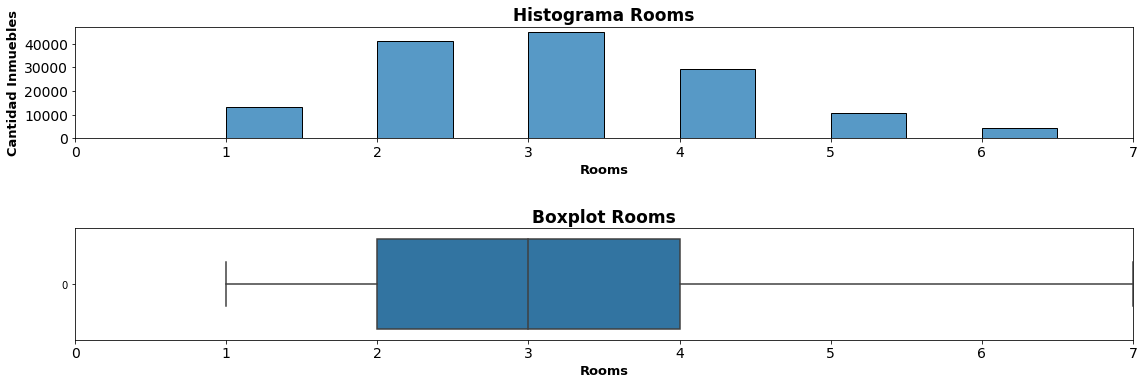

In [29]:
# SE GRAFICA LA DISTRIBUCION DE VARIABLE: ROOMS

# Ingresar el nombre de la columna deseada:
columna = 'rooms'
df = data_drop
# Se crea la figura
plt.figure(figsize=(16,6))
plt.subplots_adjust(hspace=10)

# Se crea el plot
ax1 = plt.subplot(2,1,1)
#sns.histplot(data=rooms_df, binwidth=.5)
sns.histplot(data= df['rooms'], binwidth=.5)
ax1.set_xlim([0,7])
ax1.set_title('Histograma ' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Cantidad Inmuebles', fontsize=13, fontweight ="bold")

ax2 = plt.subplot(2,1,2)
#sns.boxplot(data = df['rooms'], orient='horizontal')
sns.boxplot(data= df['rooms'], orient='horizontal')
ax2.set_xlim([0,7])
ax2.set_title('Boxplot ' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=13, fontweight ="bold")

plt.tight_layout()
plt.show()

A continuación, se determina el rango apropiado para columna 'bedrooms':

In [30]:
#Evaluando los límites para variable bedrooms:
print('Evaluando los percentilos de bedrooms')
df = data_drop
columna = 'bedrooms'
print(df[columna].describe(percentiles=[0.1,0.9]))

#Evaluando límites según Z-score:
print('''

Evaluando los límites según Z-score:''')
maximo = np.round(df[columna].mean() + 3*df[columna].std(), decimals=1)
minimo = np.round(df[columna].mean() - 3*df[columna].std(), decimals=1)
print('Z-score max: ', maximo) 
print('Z-score min: ', minimo)

#Evaluando límites según IQR:
percentile25 = df[columna].quantile(0.25)
percentile75 = df[columna].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
maximo_iqr = np.round(percentile75 + 1.5 * iqr, decimals=1)
minimo_iqr = np.round(percentile25 - 1.5 * iqr, decimals=1)
print('''

Evaluando los límites según IQR: ''')
print('Outlier IQR, max: ', maximo_iqr)
print('Outlier IQR, min: ', minimo_iqr)

print('''

Se adopta, para bedrooms, un rango de, ''', np.min(df[columna]), 'a', maximo_iqr)

Evaluando los percentilos de bedrooms
count    146660.000000
mean          1.983240
std           1.151304
min           0.000000
10%           1.000000
50%           2.000000
90%           3.000000
max          15.000000
Name: bedrooms, dtype: float64


Evaluando los límites según Z-score:
Z-score max:  5.4
Z-score min:  -1.5


Evaluando los límites según IQR: 
Outlier IQR, max:  6.0
Outlier IQR, min:  -2.0


Se adopta, para bedrooms, un rango de,  0.0 a 6.0


Se grafica a continuación la distribución de la variable bedrooms, para advertir si la misma es normal o desplazada:

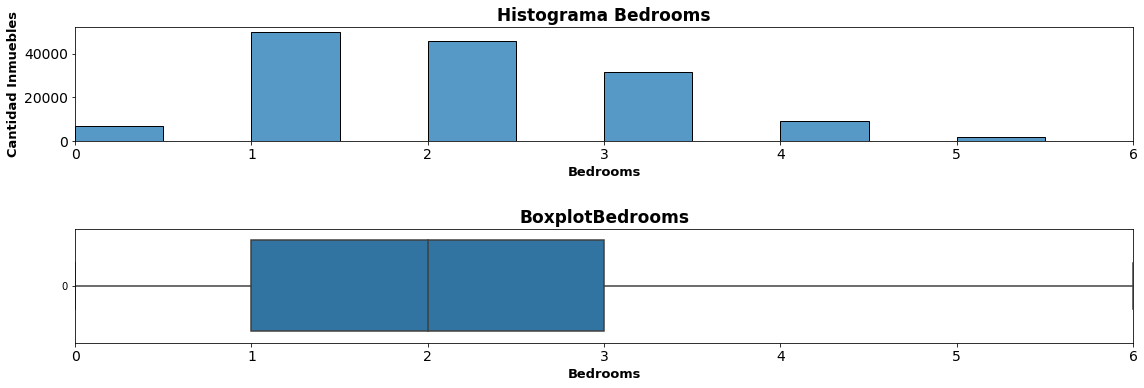

In [31]:
# SE GRAFICA LA DISTRIBUCION DE VARIABLE: BEDROOMS

#ingresar el nombre de columna deseada:

columna= 'bedrooms'
df = data_drop
# Se crea la figura:
plt.figure(figsize=(16,6))
plt.subplots_adjust(hspace=8)

# Se crea el plot:
ax1 = plt.subplot(2,1,1)
sns.histplot(data=df['bedrooms'], binwidth=.5)
ax1.set_xlim([0,6])
ax1.set_title('Histograma ' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=13, fontweight ="bold")
plt.ylabel('Cantidad Inmuebles', fontsize=13, fontweight ="bold")

ax2 = plt.subplot(2,1,2)
sns.boxplot(data= df['bedrooms'], orient='horizontal')
ax2.set_xlim([0,6])
ax2.set_title('Boxplot' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=13, fontweight ="bold")

plt.tight_layout()
plt.show()

La distribución de bedrooms se aprecia con cierto desplazamiento. EVALUAR APLICACIÓN DE ALGUNA OPERACIÓN ALGEBRAICA PARA INTENTAR LOGRAR LA NORMALIZACIÓN DE LA DISTRIBUCIÓN.

A continuación, se determina el rango apropiado para columna 'bathrooms':

In [32]:
#Evaluando los límites para variable bathrooms:
print('Evaluando los percentilos de bathrooms')
df = data_drop
columna = 'bathrooms'
print(df[columna].describe(percentiles=[0.1,0.9]))

#Evaluando límites según Z-score:
print('''

Evaluando los límites según Z-score:''')
maximo = np.round(df[columna].mean() + 3*df[columna].std(), decimals=1)
minimo = np.round(df[columna].mean() - 3*df[columna].std(), decimals=1)
print('Z-score max: ', maximo) 
print('Z-score min: ', minimo)

#Evaluando límites según IQR:
percentile25 = df[columna].quantile(0.25)
percentile75 = df[columna].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
maximo_iqr = np.round(percentile75 + 1.5 * iqr, decimals=1)
minimo_iqr = np.round(percentile25 - 1.5 * iqr, decimals=1)
print('''

Evaluando los límites según IQR: ''')
print('Outlier IQR, max: ', maximo_iqr)
print('Outlier IQR, min: ', minimo_iqr)

print('''

Se adopta, para bathrooms, un rango de, ''', np.min(df[columna]), 'a', np.round(maximo,0))

Evaluando los percentilos de bathrooms
count    140703.000000
mean          1.599994
std           0.889324
min           1.000000
10%           1.000000
50%           1.000000
90%           3.000000
max          14.000000
Name: bathrooms, dtype: float64


Evaluando los límites según Z-score:
Z-score max:  4.3
Z-score min:  -1.1


Evaluando los límites según IQR: 
Outlier IQR, max:  3.5
Outlier IQR, min:  -0.5


Se adopta, para bathrooms, un rango de,  1.0 a 4.0


Se grafica a continuación la distribución de la variable bathrooms, para advertir si la misma es normal o desplazada:

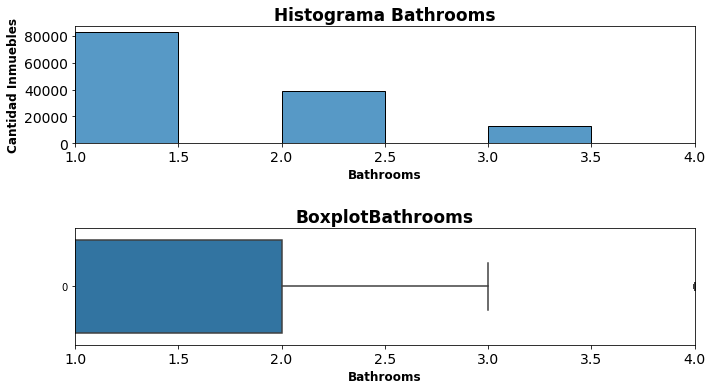

In [33]:
#DISTRIBUCION DE VARIABLE: BATHROOMS

# Se procede a introducir el nombre de la columna deseada:

columna = 'bathrooms'
df = data_drop

plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace=10)

ax1 = plt.subplot(2,1,1)
sns.histplot(data= df['bathrooms'], binwidth=.5)
ax1.set_xlim([1,4])
ax1.set_title('Histograma ' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")
plt.ylabel('Cantidad Inmuebles', fontsize=12, fontweight ="bold")

ax2 = plt.subplot(2,1,2)
sns.boxplot(data= df['bathrooms'], orient='h')
ax2.set_xlim([1,4])
ax2.set_title('Boxplot' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")

plt.tight_layout()
plt.show()

Se observa en gráfico de arriba un desplazamiento relevante de los valores de la variable bathrooms.

A continuación, se determina el rango apropiado para columna 'surface_total':

In [34]:
#Evaluando los límites para variable surface_total:

print('Evaluando los percentilos de surface_total')
df = data_drop
columna = 'surface_total'
print(df[columna].describe(percentiles=[0.1,0.9]))

#Evaluando límites según Z-score:
print('''

Evaluando los límites según Z-score:''')
maximo = np.round(df[columna].mean() + 3*df[columna].std(), decimals=1)
minimo = np.round(df[columna].mean() - 3*df[columna].std(), decimals=1)
print('Z-score max: ', maximo) 
print('Z-score min: ', minimo)

#Evaluando límites según IQR:
percentile25 = df[columna].quantile(0.25)
percentile75 = df[columna].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
maximo_iqr = np.round(percentile75 + 1.5 * iqr, decimals=1)
minimo_iqr = np.round(percentile25 - 1.5 * iqr, decimals=1)
print('''

Evaluando los límites según IQR: ''')
print('Outlier IQR, max: ', maximo_iqr)
print('Outlier IQR, min: ', minimo_iqr)

print('''

Se adopta, para surface_total, un rango de, ''', df[columna].quantile(.1), 'a', maximo_iqr)

Evaluando los percentilos de surface_total
count    126648.000000
mean        216.378237
std        2033.521746
min           1.000000
10%          40.000000
50%          78.000000
90%         289.000000
max      193549.000000
Name: surface_total, dtype: float64


Evaluando los límites según Z-score:
Z-score max:  6316.9
Z-score min:  -5884.2


Evaluando los límites según IQR: 
Outlier IQR, max:  272.0
Outlier IQR, min:  -80.0


Se adopta, para surface_total, un rango de,  40.0 a 272.0


Se grafica a continuación la distribución de la variable surface_total, para advertir si la misma es normal o desplazada:

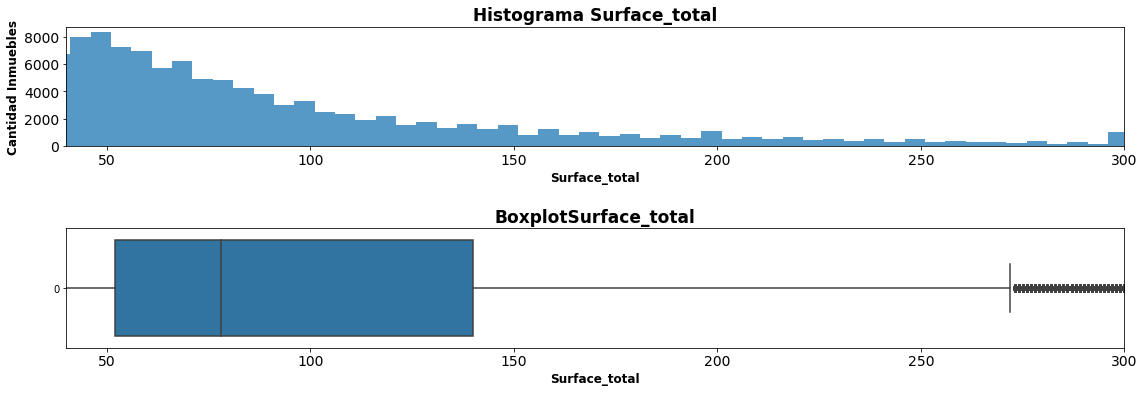

In [35]:
#DISTRIBUCION DE VARIABLE: SURFACE_TOTAL

columna = 'surface_total'
df = data_drop

plt.figure(figsize=(16,6))
plt.subplots_adjust(hspace=8)

ax1 = plt.subplot(2,1,1)
sns.histplot(data= df[columna], binwidth=5)
ax1.set_xlim([40,300])                                                                             # Se incrementa el intervalo del gráfico para mejor visualización.
ax1.set_title('Histograma ' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")
plt.ylabel('Cantidad Inmuebles', fontsize=12, fontweight ="bold")

ax2 = plt.subplot(2,1,2)
sns.boxplot(data= df[columna], orient='h')
ax2.set_xlim([40,300])
ax2.set_title('Boxplot' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")

plt.tight_layout()
plt.show()

A continuación, se determina el rango apropiado para columna 'surface_covered':

In [36]:
#Evaluando los límites para variable surface_covered:

print('Evaluando los percentilos de surface_covered')
df = data_drop
columna = 'surface_covered'
print(df[columna].describe(percentiles=[0.1,0.9]))

#Evaluando límites según Z-score:
print('''

Evaluando los límites según Z-score:''')
maximo = np.round(df[columna].mean() + 3*df[columna].std(), decimals=1)
minimo = np.round(df[columna].mean() - 3*df[columna].std(), decimals=1)
print('Z-score max: ', maximo) 
print('Z-score min: ', minimo)

#Evaluando límites según IQR:
percentile25 = df[columna].quantile(0.25)
percentile75 = df[columna].quantile(0.75)
iqr = percentile75 - percentile25
#Buscando valores Superior e Inferior:
maximo_iqr = np.round(percentile75 + 1.5 * iqr, decimals=1)
minimo_iqr = np.round(percentile25 - 1.5 * iqr, decimals=1)
print('''

Evaluando los límites según IQR: ''')
print('Outlier IQR, max: ', maximo_iqr)
print('Outlier IQR, min: ', minimo_iqr)

print('''

Se adopta, para surface_covered, un rango de, ''', df[columna].quantile(.1), 'a', df[columna].quantile(.9))

Evaluando los percentilos de surface_covered
count    126648.000000
mean        138.532073
std        1662.333956
min           1.000000
10%          37.000000
50%          68.000000
90%         184.000000
max      193549.000000
Name: surface_covered, dtype: float64


Evaluando los límites según Z-score:
Z-score max:  5125.5
Z-score min:  -4848.5


Evaluando los límites según IQR: 
Outlier IQR, max:  204.5
Outlier IQR, min:  -47.5


Se adopta, para surface_covered, un rango de,  37.0 a 184.0


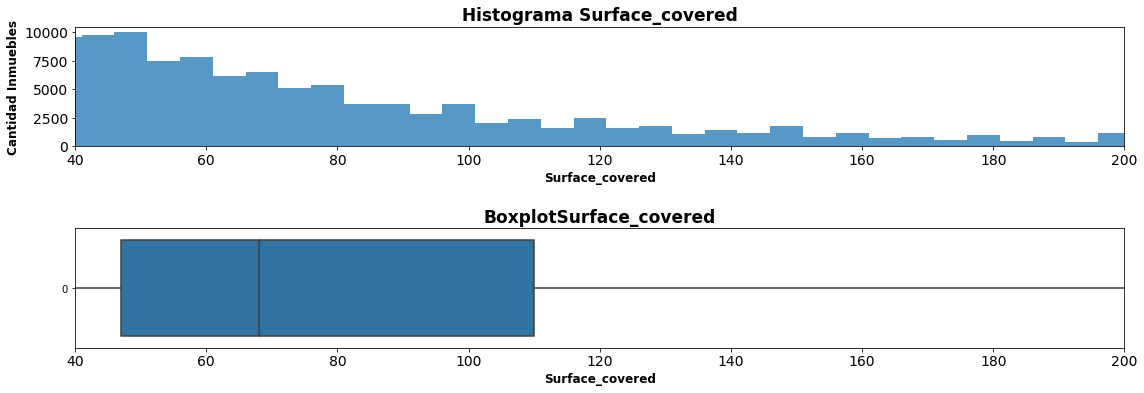

In [37]:
#DISTRIBUCION DE VARIABLE: SURFACE_COVERED

columna = 'surface_covered'
df = data_drop

plt.figure(figsize=(16,6))
plt.subplots_adjust(hspace=8)

ax1 = plt.subplot(2,1,1)
sns.histplot(data= df[columna], binwidth=5)
ax1.set_xlim([40,200])                                                                             # Se incrementa el intervalo del gráfico para mejor visualización.
ax1.set_title('Histograma ' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.yticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")
plt.ylabel('Cantidad Inmuebles', fontsize=12, fontweight ="bold")

ax2 = plt.subplot(2,1,2)
sns.boxplot(data= df[columna], orient='h')
ax2.set_xlim([40,200])
ax2.set_title('Boxplot' + columna.capitalize(), fontweight ="bold", fontsize=17, color="black")
plt.xticks(fontsize=14, color="black", rotation=0)
plt.xlabel(columna.capitalize(), fontsize=12, fontweight ="bold")

plt.tight_layout()
plt.show()

Se da inicio al análisis y preprocesamiento de los datos.

In [38]:
prop_f = data_drop.loc[(data_drop['rooms'].between(1,7) & 
                        data_drop['bedrooms'].between(1,6) & 
                        data_drop['bathrooms'].between(1,4) & 
                      data_drop['surface_total'].between(40,272) &
                      data_drop['surface_covered'].between(37,180) & 
                      data_drop['price'].between(90000,517000)),
                      ['lat', 'lon', 'l2', 'l3', 'rooms','bedrooms','bathrooms','surface_total', 'surface_covered','price','property_type']]
prop_f.shape

(81877, 11)

Se grafica a continuación la dispersión de los precios, en función de la superficie, solo para las zonas Capital Federal y Bs As G.B.A. Zona Norte:

(50.0, 250.0, 10000.0, 600000.0)

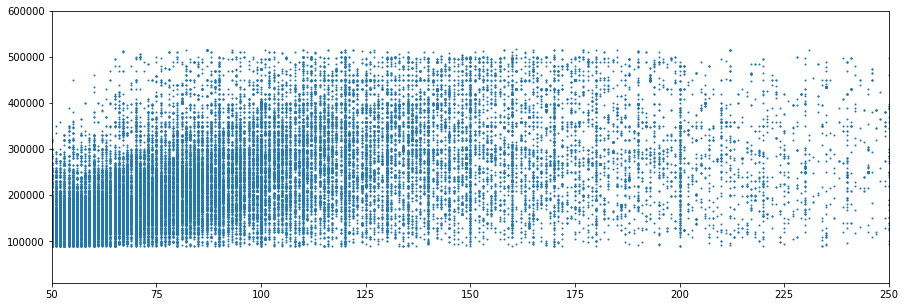

In [39]:
#DISTRIBUCION DE VARIABLE: precios
d_cf= prop_f[prop_f['l2']== 'Capital Federal']
d_zn= prop_f[prop_f['l2']== 'Bs.As. G.B.A. Zona Norte']

frames = [d_cf, d_zn]
d = pd.DataFrame(pd.concat(frames, axis=0))

x= d['surface_total']
y= d['price']
ax=plt.figure(figsize=(15,5))
plt.scatter(x,y, s=1)
plt.axis(xmin=50, xmax=250, ymin=10000, ymax=600000)

Apreciamos a continuación la matriz de correlación para la porción del dataset graficado en el scatter plot de arriba (todos los tipos de propiedades en zona norte y Cap. Fed.

In [40]:
prop_corr = d.corr()
prop_corr

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.763257,-0.109382,-0.120167,0.095534,0.057702,0.001389,0.068390
lon,-0.763257,1.000000,0.069287,0.073885,-0.051873,-0.116513,-0.016543,0.104263
rooms,-0.109382,0.069287,1.000000,0.943623,0.487140,0.668402,0.761674,0.483054
bedrooms,-0.120167,0.073885,0.943623,1.000000,0.490182,0.652678,0.752385,0.474426
bathrooms,0.095534,-0.051873,0.487140,0.490182,1.000000,0.522118,0.593919,0.586610
surface_total,0.057702,-0.116513,0.668402,0.652678,0.522118,1.000000,0.865288,0.591735
surface_covered,0.001389,-0.016543,0.761674,0.752385,0.593919,0.865288,1.000000,0.665298
price,0.068390,0.104263,0.483054,0.474426,0.586610,0.591735,0.665298,1.000000


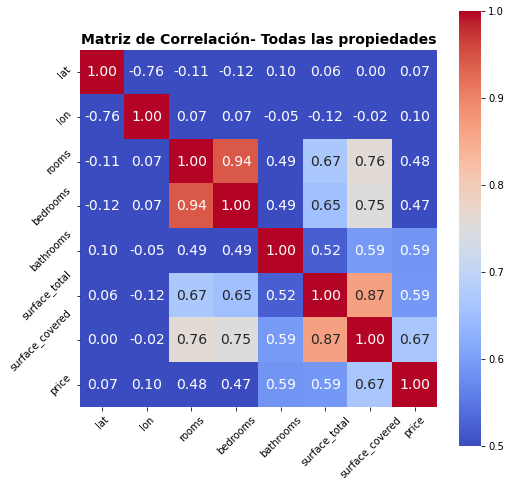

In [41]:
#Se hace la matriz de correlación para el dataset:

#corr = data.drop(columns = 'species').corr()
plt.figure(figsize=(8,8))
ax3 = sns.heatmap(prop_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 14},
           #xticklabels= data.drop(columns = 'species').columns, 
           #yticklabels= data.drop(columns = 'species').columns,
           cmap= 'coolwarm', vmin=0.5, vmax=1)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
ax3.set_title('Matriz de Correlación- Todas las propiedades', fontweight ="bold", fontsize=14, color="black")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(50.0, 250.0, 10000.0, 600000.0)

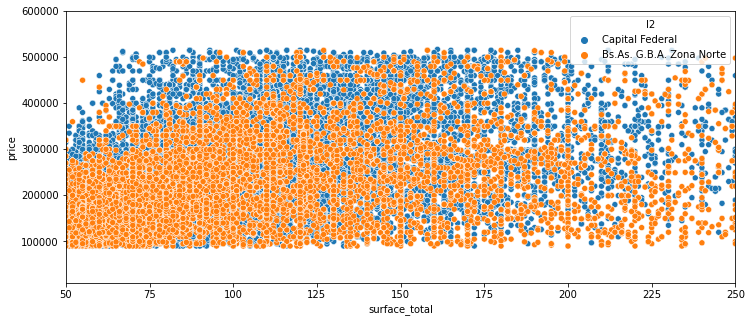

In [42]:
plt.figure(figsize=(12,5))
sns.scatterplot(x,y,hue=d['l2'])
plt.axis(xmin=50, xmax=250, ymin=10000, ymax=600000)

(62604, 11)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(50.0, 250.0, 10000.0, 600000.0)

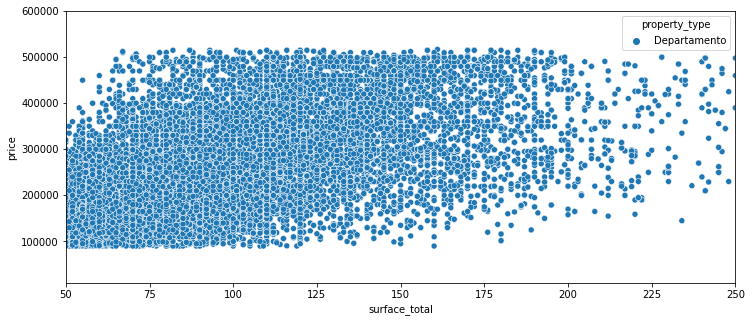

In [43]:
d_d= d[d['property_type']== 'Departamento']
print(d_d.shape)
x= d_d['surface_total']
y= d_d['price']
plt.figure(figsize=(12,5))
sns.scatterplot(x,y,hue=d_d['property_type'])
plt.axis(xmin=50, xmax=250, ymin=10000, ymax=600000)

In [44]:
d_d_corr = d_d.corr()
d_d_corr

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.790566,-0.120137,-0.128607,0.104842,0.079647,0.004599,0.071812
lon,-0.790566,1.000000,0.122827,0.122446,-0.051663,-0.054092,0.043419,0.097193
rooms,-0.120137,0.122827,1.000000,0.946632,0.503633,0.661913,0.759050,0.511435
bedrooms,-0.128607,0.122446,0.946632,1.000000,0.507540,0.654350,0.752871,0.501079
bathrooms,0.104842,-0.051663,0.503633,0.507540,1.000000,0.603361,0.637140,0.602568
surface_total,0.079647,-0.054092,0.661913,0.654350,0.603361,1.000000,0.877922,0.697904
surface_covered,0.004599,0.043419,0.759050,0.752871,0.637140,0.877922,1.000000,0.729962
price,0.071812,0.097193,0.511435,0.501079,0.602568,0.697904,0.729962,1.000000


In [45]:
#Casas, departamentos y PH, son los 3 tipos más abundantes de inmuebles.

#properati_d = prop_f[prop_f['property_type'] == 'Departamento'] #Separo los Departamentos del df principal.
#properati_c = prop_f[prop_f['property_type'] == 'Casa']         #Separo las Casas del df principal.
#properati_PH = prop_f[prop_f['property_type'] == 'PH']          #Separo los PH del df principal.

#properati_f = properati_d.append(properati_c)                         #junto los departamentos con las casas.
#properati_ff = properati_f.append(properati_PH)                       #finalmente junto los PH a los anteriores.
#v = properati_ff[properati_ff.columns[17]]     #esto es para verificar que se hizo bien el append
#v1 = np.unique(v, return_counts=True)          #esto es para verificar que se hizo bien el append
#v1                                             #esto es para verificar que se hizo bien el append

#prop_cdp = properati_ff[properati_ff['l2'] == 'Capital Federal']
#prop_cdp.shape
#prop_cdp_pd = pd.DataFrame(prop_cdp)
#prop_cdp_pd.shape

### 1.4 Identificación, evaluación y relleno de valores faltantes.

In [46]:
d_d.isna().sum()

lat                4933
lon                4933
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
property_type         0
dtype: int64

Se repite el proceso realizado anteriormente a modo de práctica, para relleno de valores de lat y lon:

------------------------------------------------------
Se repite el proceso realizado anteriormente a modo de práctica, para relleno de valores de lat y lon.

Se procede ahora a rellenar las instancias con nulos en latitud y longitud. Para eso, primero se determina el valor medio de latitud y longitud para cada barrio especificado en columna 'l3'.

In [47]:
mean_lat = d_d[['lat', 'l3']].groupby('l3').agg('mean')
mean_lat.to_dict()

{'lat': {'Abasto': -34.60354500601855,
  'Agronomía': -34.594522348526475,
  'Almagro': -34.6051436423623,
  'Balvanera': -34.608497511092814,
  'Barracas': -34.63734618656472,
  'Barrio Norte': -34.59323713464487,
  'Belgrano': -34.56283800504019,
  'Boca': -34.63322223640526,
  'Boedo': -34.62708472487508,
  'Caballito': -34.61690891245849,
  'Catalinas': -34.597997172700005,
  'Centro / Microcentro': -34.60373292138561,
  'Chacarita': -34.5891541145315,
  'Coghlan': -34.56206877159761,
  'Colegiales': -34.57687120401099,
  'Congreso': -34.60845336869276,
  'Constitución': -34.62466323808362,
  'Escobar': -34.39188990246417,
  'Flores': -34.62727224340681,
  'Floresta': -34.63152218914971,
  'General San Martín': -34.56669846461645,
  'José C Paz': -34.528449200000004,
  'Las Cañitas': -34.569504241504774,
  'Liniers': -34.643742917502635,
  'Malvinas Argentinas': -34.50938975648,
  'Mataderos': -34.65173527500599,
  'Monserrat': -34.614288387827834,
  'Monte Castro': -34.62017022292

In [48]:
mean_lon = d_d[['lon', 'l3']].groupby('l3').agg('mean')
mean_lon.to_dict()

{'lon': {'Abasto': -58.410854186106924,
  'Agronomía': -58.489925495425,
  'Almagro': -58.42223644601099,
  'Balvanera': -58.40247879865182,
  'Barracas': -58.37398268586642,
  'Barrio Norte': -58.404486760190196,
  'Belgrano': -58.453915281841006,
  'Boca': -58.36359177667444,
  'Boedo': -58.417533755178034,
  'Caballito': -58.44151696407064,
  'Catalinas': -58.371617917600005,
  'Centro / Microcentro': -58.38159318970738,
  'Chacarita': -58.448557840185835,
  'Coghlan': -58.47377068346916,
  'Colegiales': -58.452058963290845,
  'Congreso': -58.395641351066295,
  'Constitución': -58.385429682587066,
  'Escobar': -58.7575783878175,
  'Flores': -58.46268651958664,
  'Floresta': -58.48376716934195,
  'General San Martín': -58.545292017868384,
  'José C Paz': -58.733957700000005,
  'Las Cañitas': -58.434141762746684,
  'Liniers': -58.517771107034584,
  'Malvinas Argentinas': -58.69750072712001,
  'Mataderos': -58.504381217213776,
  'Monserrat': -58.38362739206207,
  'Monte Castro': -58.50

In [49]:
# Se define los barrios ('l3') como índice, para luego completar los vacíos de latitud:

df_lat = d_d.set_index('l3')
df_lat.lat.fillna(value= mean_lat.to_dict()['lat'], axis=0, inplace=True)
print(df_lat.lat.isna().sum())

0


In [50]:
# Se rellenan vacíos de longitud:

df_lon = df_lat
#df_lon = df_lat.set_index('l3')
df_lon.lon.fillna(value= mean_lon.to_dict()['lon'], axis=0, inplace=True)
print(df_lon.lon.isna().sum())

0


In [51]:
# Se restaura el índice del dataset

df_lon.reset_index(inplace=True)
df_lon.head(3)

,l3,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Boedo,-34.603683,-58.381557,Capital Federal,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
1,Boedo,-34.630349,-58.417223,Capital Federal,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
2,Flores,-34.626240,-58.462078,Capital Federal,2.0,1.0,1.0,45.0,45.0,95000.0,Departamento


Al haber evaluado la correlación entre variables, advertimos que se puede continuar el análisis con una de las 2 variables de superficie. Se procede a eliminar la columna surface_covered.

In [52]:
df2 = df_lon
df3 = df2.drop(columns= ['surface_covered'])
df3.isna().sum()

l3               0
lat              0
lon              0
l2               0
rooms            0
bedrooms         0
bathrooms        0
surface_total    0
price            0
property_type    0
dtype: int64

El hecho de haber calculado promedio de 'lat' y 'lon' para cada barrio, torna las columnas 'l3' y 'l2' innecesarias.

Se eliminan a continuación las columnas mencionadas:

In [53]:
df4 = df3.drop(columns= ['l2', 'l3'])
df4.columns
df4.shape

(62604, 8)

In [54]:
### Escalar todas las columnas numéricas del dataset:
cols_scale = ['lat', 'lon', "rooms", 'bedrooms', 'bathrooms', 'surface_total']
escalador = StandardScaler()

df5 = pd.DataFrame(escalador.fit_transform(df4[cols_scale]))
#df6 = df5.drop(columns=[0,1,2,3,4,5])
#df6.shape
df6 = df5.rename(columns= {0:'lat', 1: 'lon', 2: "rooms", 3: 'bedrooms', 4: 'bathrooms', 5: 'surface_total'})
print('df6: ', df6.shape)
df6.isna().sum()

df6:  (62604, 6)


lat              0
lon              0
rooms            0
bedrooms         0
bathrooms        0
surface_total    0
dtype: int64

In [55]:
df4_drop = df4.drop(columns=['property_type', 'price'])
print(df4_drop.shape)
df7 = pd.DataFrame(df4[['property_type', 'price']])
pd.DataFrame(df7)
print('nulos en df7: ', df7.isna().sum())
print('df7:', df7.shape)
frames = [df6, df7]
df8 = pd.DataFrame(pd.concat(frames, axis=1))
print('df8: ', df8.shape)
df8.isna().sum()

(62604, 6)
nulos en df7:  property_type    0
price            0
dtype: int64
df7: (62604, 2)
df8:  (62604, 8)


lat              0
lon              0
rooms            0
bedrooms         0
bathrooms        0
surface_total    0
property_type    0
price            0
dtype: int64

Si el filtrado del dataset hubiera dado lugar a conservar distintos tipos de propiedades en la columna categórica property_type, sería válido hacer encoding, creando columnas binarias para cada tipo de propiedad.

Abajo se obtiene el dataframe 'df9' con encoding. El mismo da como resultado una sola columna que codifica el tipo de propiedad 'Departamento', la cual es válida para no tener variables categóricas en el dataset, pero entregaría más información en caso que se incluyeran más tipos de propiedades.

Finalmente, para el presente caso se podría eliminar la columna property_type directamente.

In [56]:
df9 = pd.get_dummies(df8, columns= ['property_type'])
df9.isna().sum()
print(df9.shape)
df9.columns

(62604, 8)


Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'price', 'property_type_Departamento'],
      dtype='object')

# 2 Modelos de ML

En esta sección se evalúan modelos para el dataset filtrado en surface_total 40 a 500 m2.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
sns.set()

from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon
from scipy.stats import randint
from sklearn.model_selection import learning_curve
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

In [58]:
# Se prepara el data set para entrenar el modelo
features= df9.drop(columns=['price'])
columnas= features.columns
columnas

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'property_type_Departamento'],
      dtype='object')

In [59]:
X = features

y = df9['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=40)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(43822, 7) (43822,) (18782, 7) (18782,)


##2.1 MODELO LINEAR REGRESSION- BENCHMARK - SPRINT 1

Corremos el modelo de regresión lineal definido como Benchmark en Sprint 1, para evaluar como se desempeña con el nuevo tratamiento realizado al dataset.

In [ ]:
# Se crea un modelo de regresión lineal que hará la función de benchmark
linear_model = LinearRegression()

# Se entrena el modelo
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(linear_model.coef_, linear_model.intercept_)

[27560.96378341 35647.41622766  5393.95111652 -3817.15826208
 25189.07584918 47963.30230449     0.        ] 211085.76101399722


In [ ]:
plt.rcdefaults()

In [ ]:
def show_graficos(X_train, X_test, y_train, y_test, modelo):
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    plt.figure(figsize = (12,6),)
    plt.suptitle("""Histograma de los errores ( y−ypredicho ) y gráfico de dispersión de  y  vs  ypredicho  para el conjunto de test""",fontweight = 'black', fontsize=13)
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 60, label = 'train', color='red')
    sns.distplot(y_test - y_test_pred, bins = 60, label = 'test', color='blue')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel('Errores', fontsize=14,fontweight = 'black')
    plt.legend()
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    ax.plot(lims, lims, 'k-', alpha=.75, zorder=0)       
    plt.xlabel('Valores reales del precio (UDS)',fontsize=14,fontweight = 'black')
    plt.ylabel('Predicción de los valores del precio (UDS)',fontsize=14,fontweight = 'black')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.tight_layout(w_pad=5.61, rect=(0,0,0.95,0.95))
    #return
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


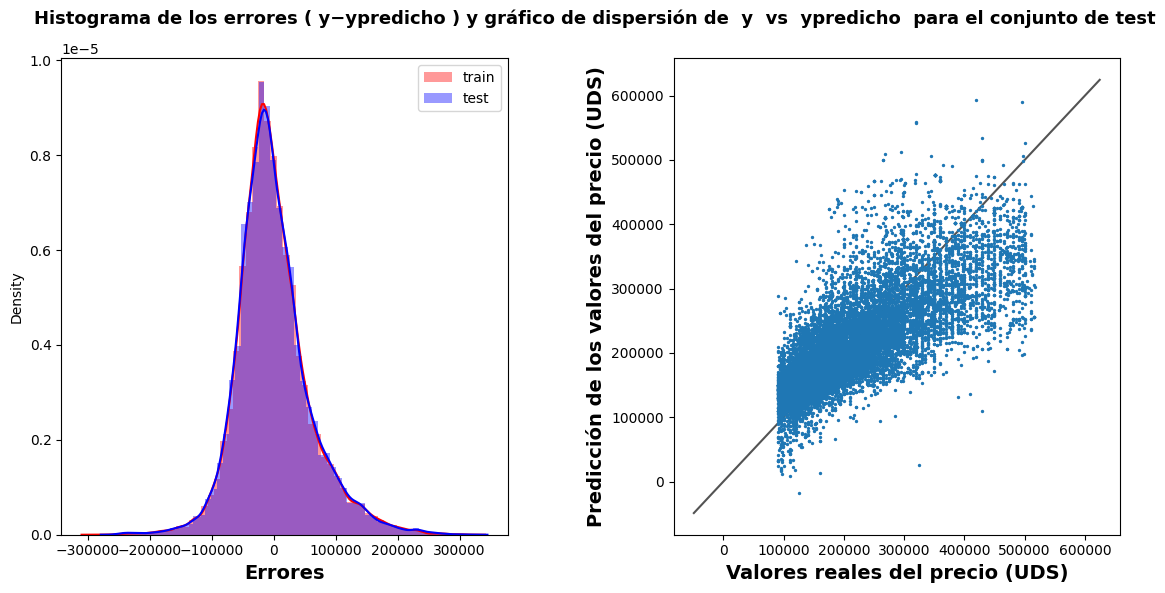

In [ ]:
show_graficos(X_train, X_test, y_train, y_test,linear_model)

Se evalúa el modelo con métrica RMSE:

In [ ]:
print('Modelo BENCHMARK')
#Train
y_train_pred = linear_model.predict(X_train) #Predecimos sobre train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) #Evaluamos train con RMSE
print("RMSE - LINEAR MOD Regresión - y_train predicho:", "{:.2f}".format(rmse_train)) #Imprimimos el RMSE

#Test
y_test_pred = linear_model.predict(X_test) #Predecimos sobre test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) #Evaluamos la predicción con RMSE

print("RMSE - LINEAR MOD Regresión - y_test predicho:", "{:.2f}".format(rmse_test)) #Imprimimos el RMSE

Modelo BENCHMARK
RMSE - LINEAR MOD Regresión - y_train predicho: 58957.87
RMSE - LINEAR MOD Regresión - y_test predicho: 59339.70


##2.2 MODELO KNN - Sprint 1

Corremos el modelo de regresión lineal KNN definido en Sprint 1, para evaluar como se desempeña con el nuevo tratamiento realizado al dataset.

In [ ]:
# Evaluamos nuevamente el modelo KNN según hiperparámetro (vecinos = 5)
vecinos = 5
knn_regressor = KNeighborsRegressor(n_neighbors=vecinos)
knn_regressor.fit(X_train, y_train)

print('Modelo KNN, para Cant. vecinos = ', vecinos)
#Train
y_train_pred = knn_regressor.predict(X_train) #Predecimos sobre train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) #Evaluamos train con RMSE
print("RMSE - KNN Regresión - y_train:", "{:.2f}".format(rmse_train)) #Imprimimos el RMSE

#Test
y_test_pred = knn_regressor.predict(X_test) #Predecimos sobre test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) #Evaluamos la predicción con RMSE
print("RMSE - KNN Regresión - y_test:", "{:.2f}".format(rmse_test)) #Imprimimos el RMSE

yhat = knn_regressor.predict(X)

SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('r2: ',r_squared, ', r2-ajustado: ', adjusted_r_squared)

Modelo KNN, para Cant. vecinos =  5
RMSE - KNN Regresión - y_train: 31696.91
RMSE - KNN Regresión - y_test: 40057.58
r2:  0.861360184626749 , r2-ajustado:  0.8613446807813337


###2.2.1 Validación Cruzada MODELO KNN

Evaluamos validación cruzada para dicho modelo.

In [ ]:
# Validación cruzada, CV:
knn_regressor_CV = cross_val_score(knn_regressor, X, y, cv=6)
print(knn_regressor_CV)
print(knn_regressor_CV.mean())

[0.83678428 0.82781921 0.82089205 0.83155656 0.81784937 0.59994256]
0.7891406728907141


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


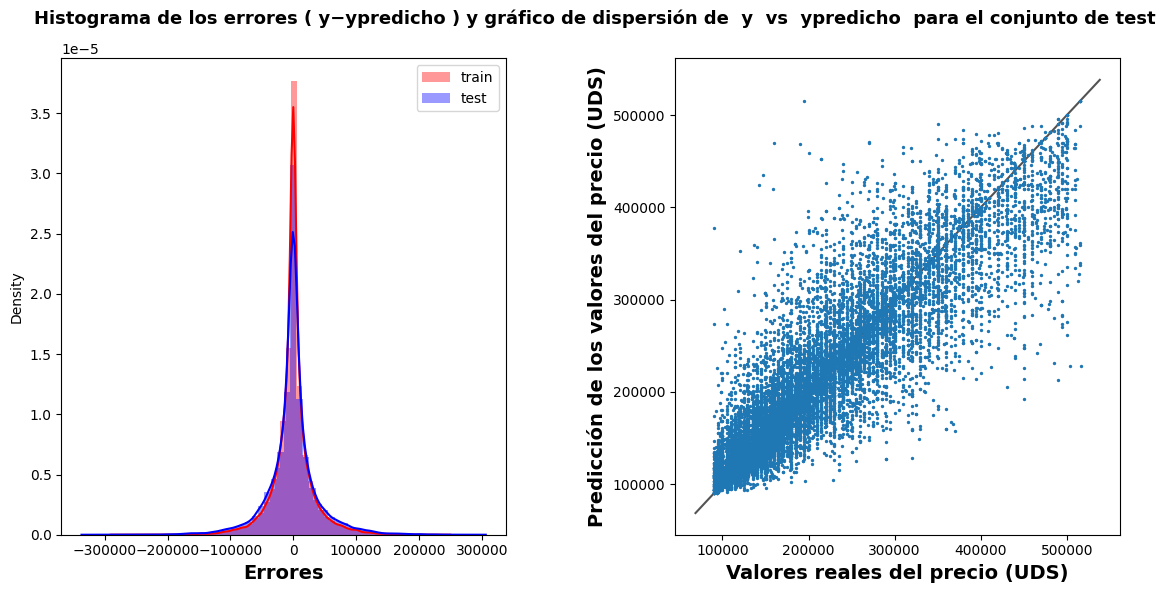

In [ ]:
show_graficos(X_train, X_test, y_train, y_test,knn_regressor)

##2.3 MODELO Árbol de Decisión - SPRINT 1

Creación, entrenamiento y graficación de los errores de 'train' y 'test' y, y-predicho Vs y-real, para el modelo árbol de decisión aplicado en SPRINT 1. Para contrastar con el desempeño logrado en Sprint 1, se define la máxima profundidad = 2, al igual que se hizo en dicho trabajo.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


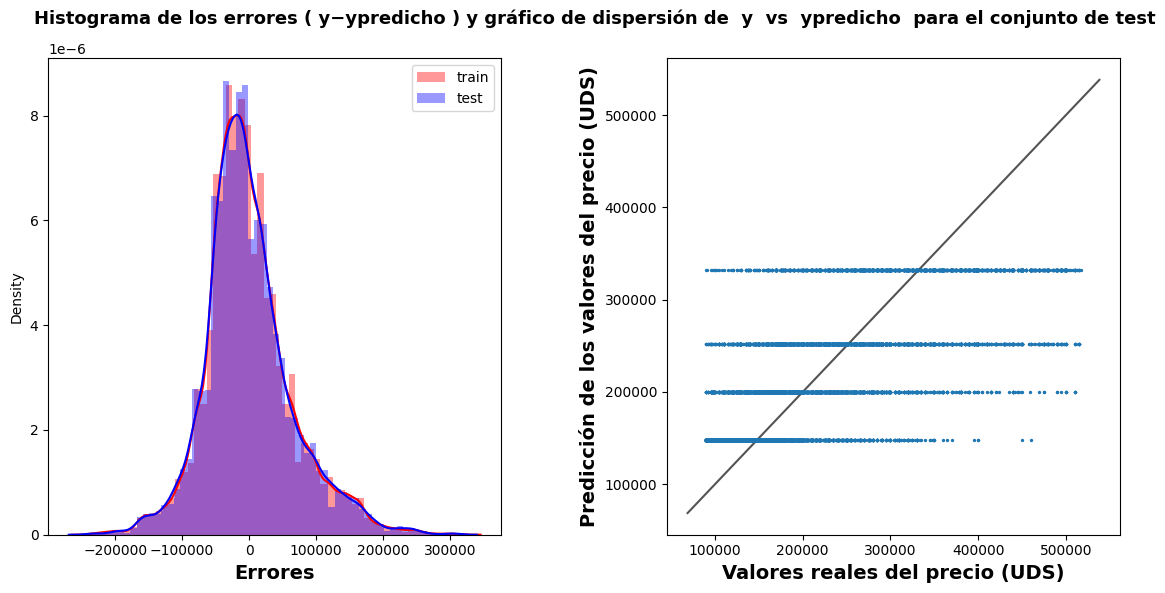

In [ ]:
# Declaramos la función DecisionTreeRegressor y la entrenamos
tree_regressor = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_regressor.fit(X_train, y_train)

# Visualizamos gráficos de errores para árbol de decisión
show_graficos(X_train, X_test, y_train, y_test,tree_regressor)

El modelo árbol de decisión con profundidad máxima 2, muestra distribuciones similares para train y test, con valores muy parecidos, y conformando una distribución muy aproximada a una normal

Se calcula RMSE y r2 para evaluar el MODELO ÁRBOL DE DECISIÓN, con profundidad máxima = 2.

RMSE:

In [ ]:
print('Modelo ÁRBOL DE DECISIÓN')
#Train
y_train_pred = tree_regressor.predict(X_train) #Predecimos sobre train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) #Evaluamos train con RMSE
print("RMSE - DT Regresión - y_train:", "{:.2f}".format(rmse_train)) #Imprimimos el RMSE

#Test
y_test_pred = tree_regressor.predict(X_test) #Predecimos sobre test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) #Evaluamos la predicción con RMSE
print("RMSE - DT Regresión - y_test:", "{:.2f}".format(rmse_test)) #Imprimimos el RMSE

Modelo ÁRBOL DE DECISIÓN
RMSE - DT Regresión - y_train: 65172.52
RMSE - DT Regresión - y_test: 65327.00


Se evalúa el coeficiente r-squared y adj r-squared, para el modelo de árbol de decisión, con profundidad máxima = 2:

In [ ]:
yhat = tree_regressor.predict(X)

SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('r2: ', r_squared, """
r2_ajustado: """, adjusted_r_squared)

r2:  0.5022226557881286 
r2_ajustado:  0.5021669902278775


Al observar los valores de las métricas obtenidos en MODELO DE ÁRBOL DE DECISIÓN comparados con dichos valores obtenidos en Sprint 1 para el mismo modelo, se aprecia una notoria mejoría de la métrica RMSE.

Sprint1:

*   RMSE - DT Regresión - y_train: 206608.36
*   RMSE - DT Regresión - y_test: 209013.62

Sprint 2 actual:


*   RMSE - DT Regresión - y_train: 65165.74
*   RMSE - DT Regresión - y_test: 64631.16

Los valores actuales representan una reducción de la métrica RMSE del orden de 68% para train y 69% para test.

Por otro lado, el coeficiente r2 y r2-ajustado arroja para el modelo mencionado, en el presente trabajo, valores muy próximos a aquellos obtenidos en Sprint 1.

Sprint 1:
 

*  r2: 0.5190000690992735
*  r2-ajustado: 0.5189703825100285

Sprint 2:


*  r2: 0.5022226557881286 
*  r2-ajustado: 0.5021669902278775

Se observa una reducción en los valores r2 y r2-ajustado del orden de 4% para train y 3.9% para test.







En comparación con lo realizado en Sprint 1, en el presente se tuvo en cuenta un dataset similar, ya que se hizo un filtrado de outliers de iguales valores que aquellos considerados en Sprint 1.

La diferencia apreciable en lo trabajado sobre el dataset en este Sprint radica en la ingeniería de features y preprocesamiento de datos (de ahí que son datasets similares, más no iguales a pesar de haber sido filtrados con los mismos límites).

El hecho de haber trabajado en rellenar valores faltantes, eliminar columnas que no aportaban valor al modelo, realizar escalado y normalización, todo ello contribuye a la reducción de dispersión y finalmente a un mejor desempeño del modelo.

##2.4 MODELOS AVANZADOS. Ensamble AdaBoost

Se declara y se entrena el regresor AdaBoostRegressor con sus parámetros por defecto.

El modelo que usaremos como estimador débil es, DecisionTreeRegressor.

In [ ]:
ada_clf = AdaBoostRegressor(DecisionTreeRegressor())
# Entrenamos el modelo
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

Se calcula ahora el error RMSE, para evaluar la predicción de train y test y de esa forma obtener una idea del sesgo o varianza que padezca el modelo.

In [ ]:
y_train_pred = ada_clf.predict(X_train) # Se hace la predicción sobre train
y_test_pred = ada_clf.predict(X_test)   # Se hace la predicción sobre test

# Train. Se calcula el error RMSE.

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) #Evaluamos train con RMSE
print("RMSE - AdaBoostRegressor - y_train predicho:", "{:.2f}".format(rmse_train)) #Imprimimos el RMSE

# Test. Se calcula el error RMSE.

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) #Evaluamos la predicción con RMSE
print("RMSE - AdaBoostRegressor - y_test predicho:", "{:.2f}".format(rmse_test)) #Imprimimos el RMSE

RMSE - AdaBoostRegressor - y_train predicho: 12877.36
RMSE - AdaBoostRegressor - y_test predicho: 31291.59


In [ ]:
Adareg_y_train_pred = 12877.36
DTreg_y_train_pred = 65172.52
Redux_percent_y_train= ((65172.52-12877.36) / 65172.52) * 100

Adareg_t_test_pred = 31291.59
DTreg_y_test_pred = 65327.00
Redux_percent_y_test = ((65327.00-31291.59) / 65327.00) * 100

Redux_train= np.round(Redux_percent_y_train,1)
Redux_test = np.round(Redux_percent_y_test,1)

print('Reducción porcentual de RMSE <y train predicho> AdaBoostRegressor es: ',Redux_train,' %',"""
Reducción porcentual de RMSE <y test predicho> AdaBoostRegressor es: """, Redux_test,' %')

Reducción porcentual de RMSE <y train predicho> AdaBoostRegressor es:  80.2  % 
Reducción porcentual de RMSE <y test predicho> AdaBoostRegressor es:  52.1  %


El ensamble de árboles de decisión de baja profundidad que configura Adaboost arroja valores considerablemente mejores para la métrica RMSE que el modelo Árbol de Decisión simple utilizado en SPRINT 1.


*   RMSE, DT Regressor - y_train predicho: 65172.52
*   RMSE, DT Regressor - y_test predicho: 65327.00

*   RMSE AdaBoostRegressor - y_train predicho: 12877.36
*   RMSE AdaBoostRegressor - y_test predicho: 31291.59

Así, los valores de RMSE de 'y_train predicho' e 'y_test predicho' arrojados por AdaBoostRegressor, para el presente caso, presenta reducciones porcentuales muy considerables de 80.2 % y 52.1 %, respectivamente. 

###2.4.1 Optimización de Hiperparámetros- GridSearchCV()

Se realiza validación cruzada y optimización de hiperparámetros GridSearchCV(), para el modelo AdaBOOST.

In [ ]:
# Validación cruzada, CV:
ada_clf_scores = cross_val_score(ada_clf, X, y, cv=5)
print(ada_clf_scores)
print(ada_clf_scores.mean())

[0.90144304 0.89492256 0.88952113 0.90457877 0.49193451]
0.8164800016140126


In [ ]:
param = {'n_estimators':np.arange(50,110)}

In [ ]:
# # Estrategia de validación cruzada: GridSearchCV():
model = GridSearchCV(ada_clf, param_grid= param, cv=5, scoring= 'neg_root_mean_squared_error')
#model = GridSearchCV(ada_clf, param_grid= param, cv=5)

# Entrenamos: AdaBoostRegressor con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=None,
                                                                              max_features=None,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                                              min

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores
scores.mean_fit_time.sum()

Mejores parametros: {'n_estimators': 52}
Mejor Score: -32728.245724254673



254.74364638328552

La optimización de hiperparámetros con validación cruzada GridSearchCV arroja una cantidad óptima de estimadores igual a 52, de acuerdo a un rango definido de 50 a 110.

Además, se selecciona la métrica 'negative RMSE' para la evaluación y comparativa entre sí de modelos avanzados optimizados.

###2.4.2  Optimización de Hiperparámetros- RandomizedSearchCV()

Se realiza optimización de hiperparámetros  RandomizedSearchCV(), para el modelo AdaBOOST.

In [ ]:
# Estrategia de validación cruzada: RandimizedSearchCV():
iteraciones= 100
#dict_distrib= {'C': expon(scale=100), 'gamma': expon(scale=.1), 'kernel': ['rbf'], 'class_weight':['balanced', None]}
param_distributions = {'n_estimators': randint(50, 70)}

model_rand = RandomizedSearchCV(ada_clf, n_iter= iteraciones, scoring= 'neg_root_mean_squared_error', param_distributions=param_distributions)

# Entrenamos: AdaBoostRegressor con la grilla definida arriba y CV con n_iter = iteraciones.
model_rand.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                    criterion='mse',
                                                                                    max_depth=None,
                                                                                    max_features=None,
                                                                                    max_leaf_nodes=None,
                                                                                    min_impurity_decrease=0.0,
                                                                                    min_impurity_split=None,
                                                                                    min_samples_leaf=1,
                                                                                    min_samples_split=2,
                  

In [ ]:
print("Mejores parametros: "+str(model_rand.best_params_))
print("Mejor Score: "+str(model_rand.best_score_)+'\n')

scores = pd.DataFrame(model_rand.cv_results_)
scores
scores.mean_fit_time.sum()

Mejores parametros: {'n_estimators': 61}
Mejor Score: -32610.398054531288



446.7985647201539

La optimización realizada arroja una cantidad óptima de estimadores igual a 61.

Por otro lado, se observa un tiempo de ejecución 3 veces menor para optimización de hiperparámetros realizada con RandomizedSearchCV() en relación al tiempo demandado por GridSearchCV(), siendo los scores prácticamente iguales (RMSE=-32728.24 para GridSearchCV() Vs RMSE=-32610.40 para RandomizedSearchCV()).

Habiendo realizado validación cruzada y optimización de parámetros del ensamble AdaBoost, se puede ahora evaluar dicho ensamble con la cantidad de estimadores optimizada, para obtener la métrica y compararla con la medición del ensamble evaluado con sus parámetros iniciales.

MODELO AdaBoost, evaluado con hiperparámetros optimizados para posterior comparación de su métrica contra modelo AdaBoost evaluado con parámetros por defecto:

In [ ]:
# Adoptamos n_estimators = 61, arrojado por validación RandomizedSearchCV()
ada_clf_opt = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=61)
# Entrenamos el modelo
ada_clf_opt.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=61)

In [ ]:
y_train_pred = ada_clf_opt.predict(X_train) # Se hace la predicción sobre train
y_test_pred = ada_clf_opt.predict(X_test)   # Se hace la predicción sobre test

# Train. Se calcula el error RMSE.

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) #Evaluamos train con RMSE
print("RMSE - AdaBoostRegressor OPTIMIZADO - y_train predicho:", "{:.2f}".format(rmse_train)) #Imprimimos el RMSE

# Test. Se calcula el error RMSE.

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) #Evaluamos la predicción con RMSE
print("RMSE - AdaBoostRegressor OPTIMIZADO - y_test predicho:", "{:.2f}".format(rmse_test)) #Imprimimos el RMSECorremos el modelo de regresión lineal definido como Benchmark en Sprint 1, para ver como se desempeña con el nuevo tratamiento realizado al dataset.

RMSE - AdaBoostRegressor OPTIMIZADO - y_train predicho: 13994.88
RMSE - AdaBoostRegressor OPTIMIZADO - y_test predicho: 31329.91


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


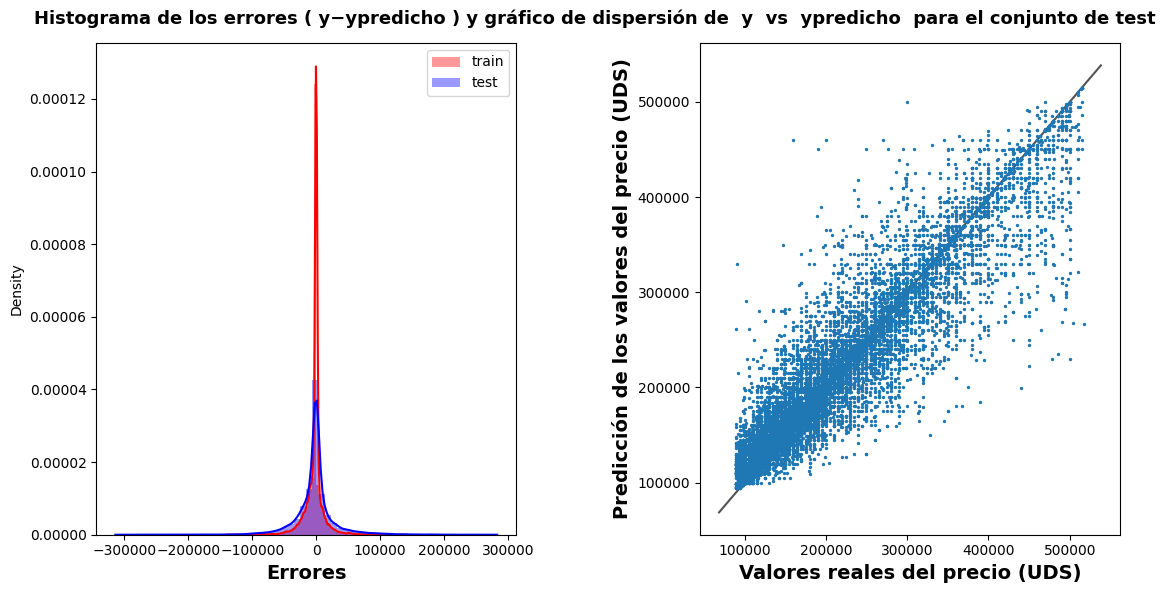

In [ ]:
show_graficos(X_train, X_test, y_train, y_test,ada_clf_opt)

In [ ]:
RMSE_Ada_y_train = 12877.36
RMSE_Ada_y_test = 31291.59

RMSE_AdaOpt_y_train = 13994.88
RMSE_AdaOpt_y_test = 31329.91

RMSE__train = np.round(((RMSE_Ada_y_train - RMSE_AdaOpt_y_train) / RMSE_Ada_y_train) * 100, decimals=1)
RMSE__test= np.round(((RMSE_Ada_y_test - RMSE_AdaOpt_y_test) / RMSE_Ada_y_test) * 100, decimals=1)

print("Variación porcentual de RMSE Optimizado Vs por defecto para <y_train> es: ",RMSE__train,' %',"""
Variación porcentual de RMSE Optimizado Vs por defecto para <y_test> es: """,RMSE__test,' %')

Variación porcentual de RMSE Optimizado Vs por defecto para <y_train> es:  -8.7  % 
Variación porcentual de RMSE Optimizado Vs por defecto para <y_test> es:  -0.1  %


Al tener en cuenta del modelo AdaBoostRegressor con parámetros por defecto Vs modelo AdaBoostRegressor optimizado vemos que la optimización no mejoró los valores de la métrica RMSE, si no que sus valores arrojaron una diferencia despreciable.

Modelo AdaBoostRegressor- Parámetros por defecto:

*   RMSE - AdaBoostRegressor - y_train predicho: 12877.36
*   RMSE - AdaBoostRegressor - y_test predicho: 31291.59

Modelo AdaBoostRegressor- Parámetros Optimizados (GridSearch):

*   RMSE - AdaBoostRegressor OPTIMIZADO - y_train predicho: 13994.88
*   RMSE - AdaBoostRegressor OPTIMIZADO - y_test predicho: 31329.91

Las diferencias porcentuales para RMSE de 'y train' e 'y test' para parámetros optimizados Vs por defecto son, -8.7 % y 0.1 %, respectivamente; los resultados marcan que no hay una diferencia apreciable.


Además, se puede mencionar que el comportamiento de los modelos mencionados es análogo en cuanto a la dispersión y sesgo, en tanto que los valores de RMSE para train y test guardan prácticamente las mismas proporciones, respectivamente.
_________________________

##2.5 MODELO Polynomialfeatures con regularización Ridge

In [100]:
# Se crea un objeto para luego obtener los términos polinómicos:
deg=4
poly= PolynomialFeatures(degree=deg, include_bias=False)

In [101]:
# Se obtienen los features transformados para luego obtener las muestras train y test:
X_new = poly.fit_transform(X)

# Se parte en train (80%) y test (20%):
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

En primer lugar entrenamos un modelo sin regularización:

In [102]:
# En primer lugar entrenamos un modelo sin regularización:

reg_lin = LinearRegression()
reg_lin.fit(X_train_new, y_train)

#Predecimos sobre train y test:
y_train_pred = reg_lin.predict(X_train_new)
y_test_pred = reg_lin.predict(X_test_new)

# #En train:
rmse_train_reg_lin = "{:.0f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))) #Obtenemos RMSE sobre train
print('RMSE Train: ', rmse_train_reg_lin, "usd")

# #En test:
rmse_test_reg_lin = "{:.0f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))) #Obtenemos RMSE sobre test
print('RMSE Test: ', rmse_test_reg_lin, 'usd')

#Calculando R2 y R2 ajustado sobre todo X
y_pred = reg_lin.predict(X_new)
SS_Residual = sum((y-y_pred)**2)       
SS_Total = sum((y-np.mean(y))**2)
r_squared_DT_depth1 = (1 - (float(SS_Residual))/SS_Total)
adjusted_r_squared_reg_lin = "{:.2f}".format((1 - (1-r_squared_DT_depth1)*(len(y)-1)/(len(y)-X.shape[1]-1))*100)
print('R2 Ajus Lineal Avanzada, Degree', deg, ': ', adjusted_r_squared_reg_lin, '%')

RMSE Train:  49767 usd
RMSE Test:  51016 usd
R2 Ajus Lineal Avanzada, Degree 4 :  70.72 %


Los valores que toma la métrica RMSE para este modelo sin regularización son similares para train y test, respectivamente.

Ahora entrenamos un modelo polynomialfeatures con regularización de Ridge:

In [103]:
# Se crea un objeto para luego obtener los términos polinómicos:
degree=4
poly= PolynomialFeatures(degree=degree, include_bias=False)

# Se obtienen los features transformados para luego obtener las muestras train y test:
X_new = poly.fit_transform(X)

# Se parte en train (80%) y test (20%):
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Se define el modelo

regular = Ridge() # Modelo evaluado para alpha = 1
regular.fit(X_train_new, y_train)

#Predecimos sobre train y test:
y_train_pred = regular.predict(X_train_new)
y_test_pred = regular.predict(X_test_new)

# #En train:
rmse_train_reg_lin = "{:.0f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))) #Obtenemos RMSE sobre train
print('MODELO Polynomial Features, RMSE Train: ', rmse_train_reg_lin, "usd")

# #En test:
rmse_test_reg_lin = "{:.0f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))) #Obtenemos RMSE sobre train
print('MODELO Polynomial Features, RMSE Test: ', rmse_test_reg_lin, 'usd')

#Calculando R2 y R2 ajustado sobre todo X
y_pred = regular.predict(X_new)
SS_Residual = sum((y-y_pred)**2)       
SS_Total = sum((y-np.mean(y))**2)
r_squared_DT_depth1 = (1 - (float(SS_Residual))/SS_Total)
adjusted_r_squared_regular = "{:.2f}".format((1 - (1-r_squared_DT_depth1)*(len(y)-1)/(len(y)-X.shape[1]-1))*100)
print('R2 Ajus Lineal Avanzada, Degree', degree, ': ', adjusted_r_squared_regular, '%')

MODELO Polynomial Features, RMSE Train:  49767 usd
MODELO Polynomial Features, RMSE Test:  51004 usd
R2 Ajus Lineal Avanzada, Degree 4 :  70.72 %


In [ ]:
regular.get_params(deep=True)

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

Para el caso de regularización de Ridge, la métrica RMSE arroja valores muy aproximados entre train y test. Esto indica que se redujo a un mínimo el sesgo observado en dicho modelo sin regularización.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


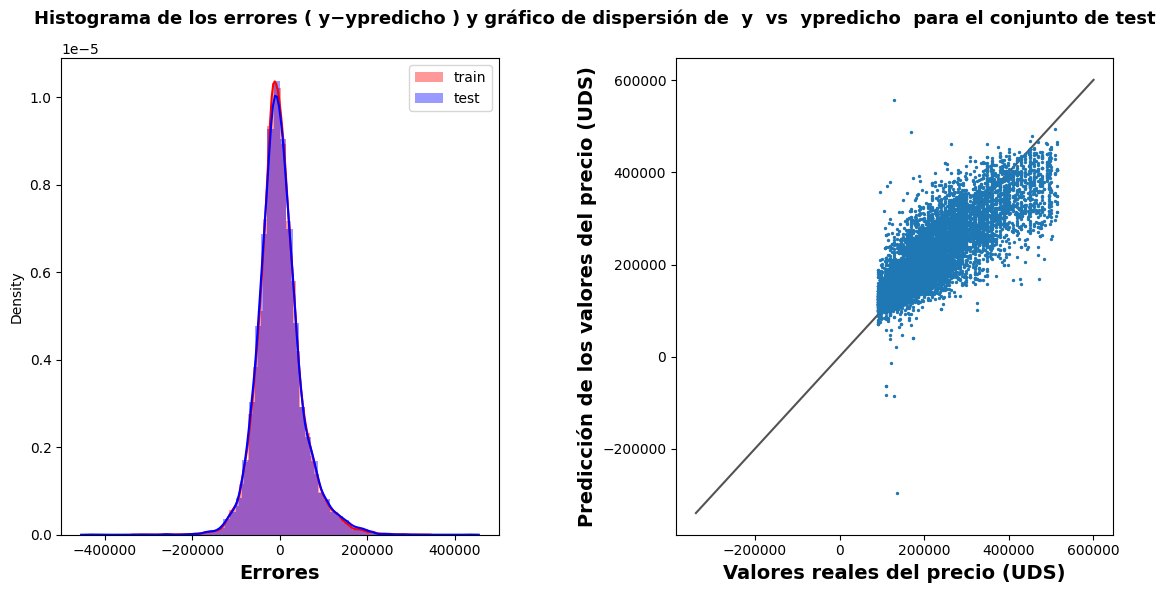

In [ ]:
show_graficos(X_train_new, X_test_new, y_train, y_test,regular)

Se aprecian a continuación las pendientes obtenidas para la regularización de Ridge.

In [ ]:
print(f'Pendientes: {regular.coef_}')
print(f'Ordenada: {regular.intercept_}')

Pendientes: [ 2.01950668e+04  1.94132357e+04  3.69810903e+03 -1.37253936e+03
  5.66700487e+03  1.73653897e+04  0.00000000e+00  6.13250242e+03
  3.93965411e+04 -3.00625592e+03 -2.88680885e+03  1.02085794e+03
  1.02204385e+04  2.01950668e+04  1.96944634e+04 -5.18933030e+03
 -9.05890753e+03  1.61487964e+03  1.41163709e+04  1.94132357e+04
 -7.71627554e+02 -2.17635350e+03 -1.89601716e+03  4.34655416e+03
  3.69810903e+03 -4.41942760e+02  1.90122384e+03  3.52284347e+03
 -1.37253936e+03 -1.79235609e+03  1.84957288e+03  5.66700487e+03
 -6.30178676e+03  1.73653897e+04  0.00000000e+00 -4.57008708e+03
  6.68102993e+03 -4.34078870e+03  1.99292259e+03 -2.49135783e+03
  3.41403067e+03  6.13250243e+03  3.44631535e+04  8.44726208e+01
 -4.53943528e+03 -3.55739936e+03  1.66638505e+04  3.93965411e+04
  1.23399552e+03  1.32121579e+02 -1.17188421e+03 -3.75029930e+03
 -3.00625592e+03 -1.79423289e+03 -2.15147008e+03  5.44647862e+03
 -2.88680885e+03 -1.85835800e+03 -7.64211695e+02  1.02085793e+03
 -5.23834000e

###2.5.1 RandomizedSearchCV()

In [ ]:
# Estrategia de validación cruzada: RandimizedSearchCV():
iteraciones= 100

#param_distributions = {'estimator__alpha': np.linspace(0.7,1.2,6)}
param_distributions={'alpha': np.linspace(-10,10,num=100)}

regular_rand = RandomizedSearchCV(regular, n_iter= iteraciones, scoring= 'neg_root_mean_squared_error', 
                                  param_distributions=param_distributions,cv=5)

# Entrenamos: regular_rand con la grilla random definida y CV con n_iter = iteraciones.
regular_rand.fit(X_train_new, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18...
         5.35353535,   5.55555556,   5.75757576,   5.95959596,
         6.16161616,   6.36363636,   6.56565657,   6.76767677,
         6.96969697,   7.17171717,   7.37373737,   7.57575758,
         7.77777778,   7.97979798,   8.18181818,   8.38383838,
         8.58585859,   8.78787879,   8.98989899,   9.19191919,
         9.39393939,   9.5959596 ,   9.7979798 ,  10.        ])},
                   pre_dispatch='2*n_jobs', ran

In [ ]:
print("Mejores parametros: "+str(regular_rand.best_params_))
print("Mejor Score: "+str(regular_rand.best_score_)+'\n')

scores = pd.DataFrame(regular_rand.cv_results_)
scores
scores.mean_fit_time.sum()

Mejores parametros: {'alpha': 10.0}
Mejor Score: -50311.805162574674



115.24526357650757

In [ ]:
regular_rand.get_params(RandomizedSearchCV)

{'cv': 5,
 'error_score': nan,
 'estimator': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': None,
 'estimator__normalize': False,
 'estimator__random_state': None,
 'estimator__solver': 'auto',
 'estimator__tol': 0.001,
 'iid': 'deprecated',
 'n_iter': 100,
 'n_jobs': None,
 'param_distributions': {'alpha': array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
          -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
          -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
          -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
          -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
          -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
          -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
          -4.34343434,  -4.14141414, 

Ahora se evalúan las métricas RMSE y r2, según los mejores parámetros obtenidos mediante RandomizedSearchCV().

In [ ]:
# Se define el modelo con hiperparámetro optimizado:

regular_opt = Ridge(alpha=800) # Modelo evaluado para alpha = 800
regular_opt.fit(X_train_new, y_train)

#Predecimos sobre train y test:
y_train_pred = regular_opt.predict(X_train_new)
y_test_pred = regular_opt.predict(X_test_new)

# #En train:
rmse_train_reg_lin = "{:.0f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))) #Obtenemos RMSE sobre train
print('MODELO Polynomial Features, RMSE Train: ', rmse_train_reg_lin, "usd")

# #En test:
rmse_test_reg_lin = "{:.0f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))) #Obtenemos RMSE sobre train
print('MODELO Polynomial Features, RMSE Test: ', rmse_test_reg_lin, 'usd')

#Calculando R2 y R2 ajustado sobre todo X
y_pred = regular.predict(X_new)
SS_Residual = sum((y-y_pred)**2)       
SS_Total = sum((y-np.mean(y))**2)
r_squared_DT_depth1 = (1 - (float(SS_Residual))/SS_Total)
adjusted_r_squared_regular = "{:.2f}".format((1 - (1-r_squared_DT_depth1)*(len(y)-1)/(len(y)-X.shape[1]-1))*100)
print('R2 Ajus Lineal Avanzada, Degree', degree, ': ', adjusted_r_squared_regular, '%')

MODELO Polynomial Features, RMSE Train:  50286 usd
MODELO Polynomial Features, RMSE Test:  51306 usd
R2 Ajus Lineal Avanzada, Degree 4 :  70.72 %


El modelo prácticamente no muestra mejores resultados en comparación con la evaluación de modelo Ridge sin realizar optimización.

##2.6 Comparación de modelo de Árbol de Decisión y Evaluación de los modelos avanzados utilizados. Selección.

Al observar los resultados de la métrica arrojados por el modelo Árbol de Decisión que se corrió en Sprint 1, se aprecia bajo sesgo, dado por la similitud de los valores de RMSE para train y test. Además, tal como se mencionó anteriormente, dicho modelo demuestra un notablemente mejor desempeño que para el dataset utilizado en Sprint anterior.

Al comparar este modelo con los modelos más complejos, se observa un desempeño similar en relación a Polynomial Features- Ridge, pero comportamiento más pobre que el ensamble AdaBoost que arroja algo de sesgo con notablemente menor varianza (evidenciado por valores más bajos de la métrica).

En la sección de modelos avanzados se implementó AdaBoost(árbol) y Polynomial features con regularización de Ridge.
Los ensambles se evaluaron con la métrica RMSE en train y test respectivamente.

El modelo AdaBoost arrojó los siguientes valores de RMSE:

*   RMSE - AdaBoostRegressor OPTIMIZADO - y_train predicho: 14234.91
*   RMSE - AdaBoostRegressor OPTIMIZADO - y_test predicho: 30497.01

Por otro lado, la métrica del modelo Polynomial Features con regularización arrojó los siguientes valores:

*   MODELO Polynomial Features, RMSE Train:  49458 usd
*   MODELO Polynomial Features, RMSE Test:  50611 usd

De acuerdo a los valores de RMSE observados para estos modelos, se aprecia una varianza del modelo levemente superior para el caso de Polynomial Features-Ridge que el ensamble AdaBoost. Por el contrario, el ensamble AdaBoost arroja un poco más de sesgo, evidenciado por la diferencia en la métrica para train y test.

Dicho esto, elegiría el modelo AdaBoost con estimador árbol de decisión, ya que el mismo arroja mejores valores de la métrica, aun cuando dichos valores presentan algo de sesgo, pero menores errores al fin.


#3 Interpretación de Modelos.

En esta instancia evaluamos la importancia que tuvieron las distintas variables en la predicción que hacen los distintos modelos avanzados evaluados.

Se observa en primer lugar, la importancia asignada a las variables para el primer modelo AdaBoost, evaluado sin validación cruzada ni optimización de parámetros.

In [ ]:
plt.rcdefaults()

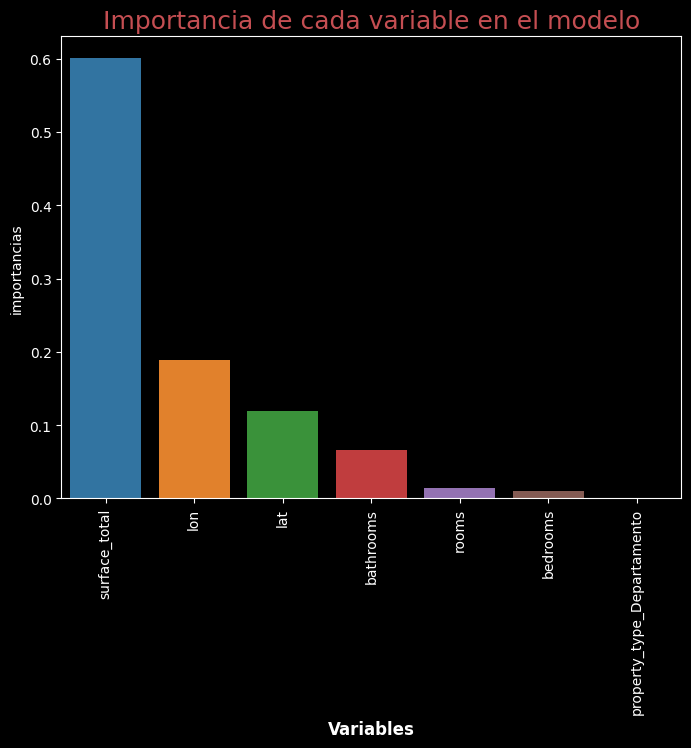

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize = (8, 6))
sns.barplot(data= pd.DataFrame({
    "Variables": X.columns,
    "importancias": ada_clf.feature_importances_}).sort_values("importancias", ascending= False),
            x = "Variables", y = "importancias", palette= 'tab10')
            #x = "Variables", y = "importancias", palette='Spectral')
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

Claramente para el ensamble AdaBoost la variable principal es la superficie total.

Por otro lado, dado que se trata de un ensamble de varios árboles de decisión, se procede ahora a detallar la importancia de las variables para un par de árboles intervinientes en el ensamble. Para este caso tendremos en cuenta el ensamble optimizado según RandomizedSearchCV().

Al realizar la optimización mencionada se obtuvo que la cantidad óptima de árboles fue de, 61 estimadores.

A continuación evaluamos la importancia de variables para el árbol número 3 y 50, respectivamente.

In [ ]:
Ada_3 = ada_clf_opt.estimators_[3]
Ada_10 = ada_clf_opt.estimators_[10]

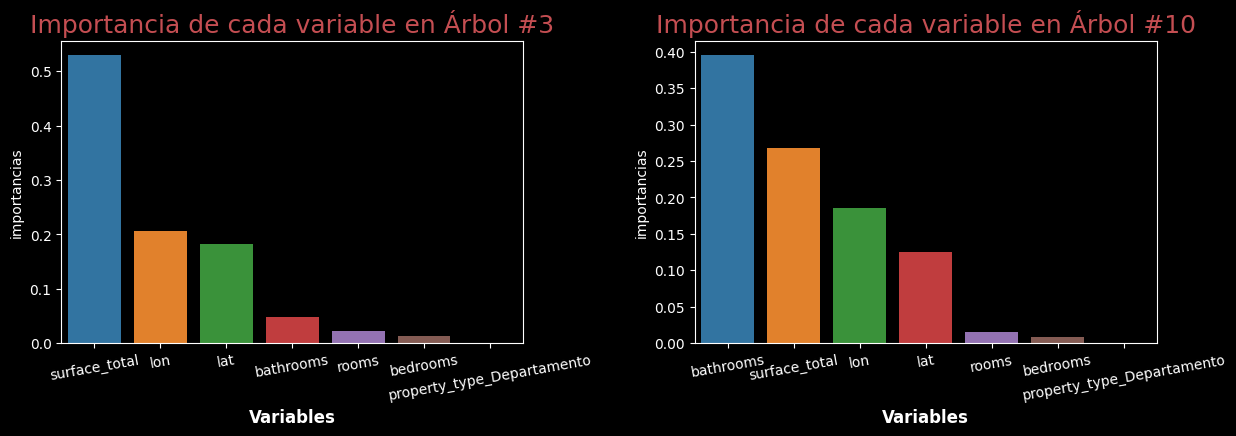

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize = (13, 5))
plt.subplot(1,2,1)
sns.barplot(data= pd.DataFrame({
    "Variables": X.columns,
    "importancias": Ada_3.feature_importances_}).sort_values("importancias", ascending= False),
            x = "Variables", y = "importancias", palette= 'tab10')
            #x = "Variables", y = "importancias", palette='Spectral')
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en Árbol #3", fontsize = 18, color = "r")
plt.xticks(rotation=10, size=10)

plt.subplot(1,2,2)
sns.barplot(data= pd.DataFrame({
    "Variables": X.columns,
    "importancias": Ada_10.feature_importances_}).sort_values("importancias", ascending= False),
            x = "Variables", y = "importancias", palette= 'tab10')
            #x = "Variables", y = "importancias", palette='Spectral')
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en Árbol #10", fontsize = 18, color = "r")
plt.xticks(rotation=10, size=10)
plt.tight_layout(h_pad=1125, pad=3)
plt.show()

Según lo observado en gráficos anteriores, el orden de importancia de las variables varía entre ambos árboles, siendo además diferente la preponderancia de cada una de ellas.

Al ver que el árbol #3 toma como principal variable la superficie total, esto me pareció esperable. Para árboles subsiguientes es llamativo como varía la importancia de las diferentes variables, situándose la superficie total en cualquier otro orden de importancia, lejos del primer lugar.

Ahora se detallan las pendientes obtenidas para la regularización de Ridge aplicada en apartado 2.5:

In [ ]:
print(f'Pendientes: {regular.coef_}')
print(f'Ordenada: {regular.intercept_}')

Pendientes: [ 2.01950668e+04  1.94132357e+04  3.69810903e+03 -1.37253936e+03
  5.66700487e+03  1.73653897e+04  0.00000000e+00  6.13250242e+03
  3.93965411e+04 -3.00625592e+03 -2.88680885e+03  1.02085794e+03
  1.02204385e+04  2.01950668e+04  1.96944634e+04 -5.18933030e+03
 -9.05890753e+03  1.61487964e+03  1.41163709e+04  1.94132357e+04
 -7.71627554e+02 -2.17635350e+03 -1.89601716e+03  4.34655416e+03
  3.69810903e+03 -4.41942760e+02  1.90122384e+03  3.52284347e+03
 -1.37253936e+03 -1.79235609e+03  1.84957288e+03  5.66700487e+03
 -6.30178676e+03  1.73653897e+04  0.00000000e+00 -4.57008708e+03
  6.68102993e+03 -4.34078870e+03  1.99292259e+03 -2.49135783e+03
  3.41403067e+03  6.13250243e+03  3.44631535e+04  8.44726208e+01
 -4.53943528e+03 -3.55739936e+03  1.66638505e+04  3.93965411e+04
  1.23399552e+03  1.32121579e+02 -1.17188421e+03 -3.75029930e+03
 -3.00625592e+03 -1.79423289e+03 -2.15147008e+03  5.44647862e+03
 -2.88680885e+03 -1.85835800e+03 -7.64211695e+02  1.02085793e+03
 -5.23834000e

Como se observa, hay pendientes tanto positivas como negativas. Dichas pendientes hablan de la dependencia del precio con cada uno de los features del dataset y los creados por el modelo.

La distribución de errores observada en los gráficos en los apartados de cada modelo es aproximadamente la normal, apreciándose distintas diferencias numéricas para la métrica RMSE en train y test.
A medida que se fueron evaluando los modelos para diferente filtrado del dataset, se obtuvieron diferentes desempeños de los mismos. Fue consistente el mejor desempeño de los modelos mientras más acotado se mantuvo el rango de superficie total, manteniendo los outliers identificados y adoptados en apartado 1.3, para el resto de las variables.
En general, salvo excepciones como el modelo polynomialfeatures sin regularización, mientras mayor se mantuvo el rango de superficie total, mayor dispersión mostraron los modelos. Esto indica que los modelos fallan con mayor frecuencia en los valores extremos.

# Adicional

## A- Transformación de datos distinta a las aplicadas

### A1- REDUCCIÓN DE DIMENSIONALIDAD

En esta sección se aplica reducción de dimensionalidad (PCA), la cual permite reducir la varianza de un modelo de machine learning.

In [ ]:
# Se importan librerías nuevamente en esta sección

from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sprint Project 2/DS_Proyecto_01_Datos_Properati.csv')

In [ ]:
data1.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
# Se renombra la columna zona:

data1.rename({'l2': 'zona'}, axis=1, inplace=True)
data1.columns
data1.shape

(146660, 19)

In [ ]:
# Se eliminan las columnas que no aportana la solución de los modelos requeridos

data_drop1 = data1.drop(columns= ['start_date', 'end_date', 'created_on', 'l1', 'currency', 'title', 'description', 'operation_type', 'lat', 'lon'])
data_drop1.shape

(146660, 9)

In [ ]:
data_drop1.isnull().sum()

zona                   0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64

In [ ]:
prop_f1 = data_drop1.loc[(data_drop1['rooms'].between(1,7) & 
                        data_drop1['bedrooms'].between(1,6) & 
                        data_drop1['bathrooms'].between(1,4) & 
                      data_drop1['surface_total'].between(40,272) &
                      data_drop1['surface_covered'].between(37,180) & 
                      data_drop1['price'].between(90000,517000)),
                      ['zona', 'rooms','bedrooms','bathrooms','surface_total', 'surface_covered','price','property_type']]
prop_f1.shape

(81110, 8)

In [ ]:
prop_f1.isnull().sum()

zona               0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

Se realiza el escalado de los datos numéricos

In [ ]:
prop_f1.columns

Index(['zona', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type'],
      dtype='object')

In [ ]:
to_scale = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']
prop_f1[to_scale] = StandardScaler().fit_transform(prop_f1[to_scale])

In [ ]:
prop_f1.shape

(81110, 8)

In [ ]:
# Generamos columnas mediante one hot encoding:

prop_f2 = pd.get_dummies(prop_f1, columns = ['zona'])
print(prop_f2.columns)
print(prop_f2.shape)

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'property_type', 'zona_Bs.As. G.B.A. Zona Norte',
       'zona_Bs.As. G.B.A. Zona Oeste', 'zona_Bs.As. G.B.A. Zona Sur',
       'zona_Capital Federal'],
      dtype='object')
(81110, 11)


In [ ]:
prop_f3 = pd.get_dummies(prop_f2, columns = ['property_type'])
print(prop_f3.columns)
print(prop_f3.shape)

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'zona_Bs.As. G.B.A. Zona Norte',
       'zona_Bs.As. G.B.A. Zona Oeste', 'zona_Bs.As. G.B.A. Zona Sur',
       'zona_Capital Federal', 'property_type_Casa',
       'property_type_Casa de campo', 'property_type_Departamento',
       'property_type_Depósito', 'property_type_Local comercial',
       'property_type_Lote', 'property_type_Oficina', 'property_type_Otro',
       'property_type_PH'],
      dtype='object')
(81110, 19)


In [ ]:
# Se prepara el data set para entrenar el modelo
features1= prop_f3.drop(columns=['price'])
columnas= features1.columns
columnas

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'zona_Bs.As. G.B.A. Zona Norte', 'zona_Bs.As. G.B.A. Zona Oeste',
       'zona_Bs.As. G.B.A. Zona Sur', 'zona_Capital Federal',
       'property_type_Casa', 'property_type_Casa de campo',
       'property_type_Departamento', 'property_type_Depósito',
       'property_type_Local comercial', 'property_type_Lote',
       'property_type_Oficina', 'property_type_Otro', 'property_type_PH'],
      dtype='object')

In [ ]:
X = features1

y = prop_f3['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=40)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(72999, 18) (72999,) (8111, 18) (8111,)


Se aplica PCA al dataset X_train:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)

In [ ]:
X1 = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))
cumulative_variance

array([0.643, 0.76 , 0.857, 0.904, 0.937, 0.958, 0.973, 0.984, 0.993,
       1.   , 1.001, 1.001, 1.001, 1.001])

se aplica PCA nuevamente, pero ahora para n_components = 6:

In [ ]:
pca = PCA(n_components=6)

In [ ]:
X2 = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))
cumulative_variance

array([0.643, 0.76 , 0.857, 0.904, 0.937, 0.958])

La aplicación de PCA para n_components = 6 representa el 95.8% de la varianza del dataset.

## B- Clustering

Aplicaremos el método de aprendizaje no supervisado K-means

In [66]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_moons

In [60]:
X.columns

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'property_type_Departamento'],
      dtype='object')

In [76]:
# se hace clustering con los features que representan la ubicación geográfica, lat, lon para evaluar la zonificación:
X_clus = X[['lat', 'lon']]
y_clus = y

print("X Cluster: ", X_clus.shape, type(X_clus))
print("y Cluster: ", y_clus.shape)

X Cluster:  (62604, 2) <class 'pandas.core.frame.DataFrame'>
y Cluster:  (62604,)


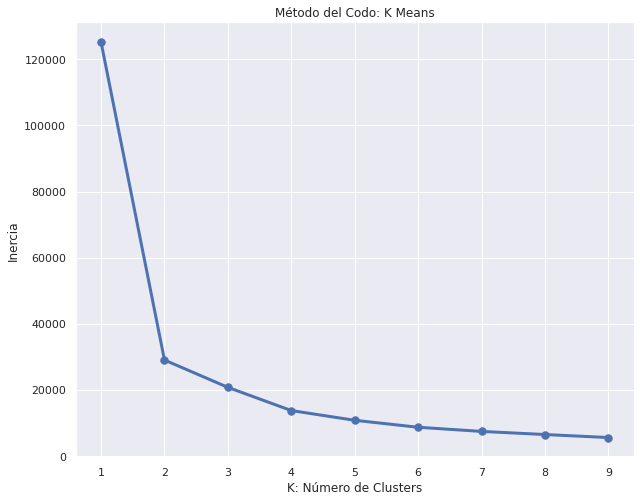

In [68]:
# Se procede a evaluar el clustering para distinta cantidad de clusters:

Sum_of_squared_distances = []

# evaluamos el modelo k-means para distinto número de clusters:
K = np.arange(1,10) 
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k,)
    km = km.fit(X_clus)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    #distancia_media = np.divide(distancia_total,X_clus.shape[0]) # no es necesario sacar el promedio, si hacemos el grafico con la inersia completa da igual
    Sum_of_squared_distances.append(distancia_total)

plt.figure(figsize = (10,8))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55)
plt.xlabel('K: Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo: K Means')

Splt.show()

Seleccionamos clusters = 5 y entrenamos el modelo.

In [69]:
km = KMeans(n_clusters=5)
km = km.fit(X_clus)

In [70]:
etiquetas_1 = km.labels_
print(etiquetas_1.shape)

(62604,)


In [71]:
centros_1 = km.cluster_centers_
print(centros_1)

[[-0.49396204  0.61039902]
 [ 0.15412336 -0.0100766 ]
 [ 2.18081663 -1.54571434]
 [-0.79655657  0.00592387]
 [ 1.84609498 -3.93483126]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


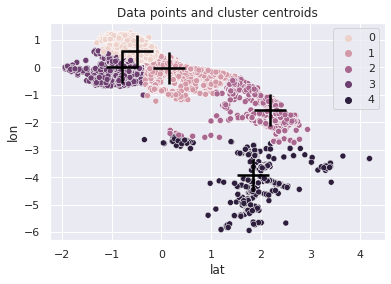

In [81]:
sns.scatterplot(x=X_clus.iloc[:,0], y=X_clus.iloc[:,-1], hue=etiquetas_1)
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

Observamos en la gráfica la separación en zonas realizada por el algoritmo k-means

# CONCLUSIONES

En el presente sprint se comenzó realizando nuevamente un EDA sobre el dataset, con motivo de identificar valores faltantes y columnas irrelevantes.
Se llevaron a cabo transformaciones de datos e ingeniería de features, tales como relleno de datos faltantes y hot encoding.
Luego de lo mencionado se obtuvo el dataframe a utilizar en los distintos tipos de modelos de ML seleccionados.
En primer lugar se evaluó un modelo de regresión lineal, como benchmark.
Luego se evaluaron los modelos KNN y ÁRBOL DE DECISIÓN utilizados en Sprint 1.
Al observar los valores de las métricas obtenidos en MODELO DE ÁRBOL DE DECISIÓN comparados con dichos valores obtenidos en Sprint 1 para el mismo modelo, se aprecia una notoria mejoría de la métrica RMSE.

Sprint1:

RMSE - DT Regresión - y_train: 206608.36
RMSE - DT Regresión - y_test: 209013.62

Sprint 2 actual:

RMSE - DT Regresión - y_train: 65165.74
RMSE - DT Regresión - y_test: 64631.16
Los valores actuales representan una reducción de la métrica RMSE del orden de 68% para train y 69% para test.

Se identifica un mejor desempeño del modelo árbol de decisión al ser entrenado con el dataset actual, al cual se le realizó un procesamiento e ingeniería de features que permite mejores predicciones.

Luego se entrenaron y evaluaron modelos avanzados. Sobre estos modelos se hizo validación cruzada y optimización de parámetros.

El ensamble de árboles de decisión de baja profundidad que configura Adaboost arrojó valores considerablemente mejores para la métrica RMSE que el modelo Árbol de Decisión simple utilizado en SPRINT 1.

RMSE, DT Regressor - y_train predicho: 65172.52

RMSE, DT Regressor - y_test predicho: 65327.00

RMSE AdaBoostRegressor - y_train predicho: 12877.36

RMSE AdaBoostRegressor - y_test predicho: 31291.59

Así, los valores de RMSE de 'y_train predicho' e 'y_test predicho' arrojados por AdaBoostRegressor, para el presente caso, presenta reducciones porcentuales muy considerables de 80.2 % y 52.1 % en relación a lo obtenido con , respectivamente.

Por otro lado, al evaluar un modelo polynomial features con y sin regularización, estos obtuvieron valores de RMSE muy cercanos entre sí, por lo cual no se apreció diferencia considerable.

Polinomial features sin regularización:

RMSE Train:  49767 usd
RMSE Test:  51016 usd
R2 Ajus Lineal Avanzada, Degree 4 :  70.72 %

Polinomial feartures con regularización de ridge:

MODELO Polynomial Features, RMSE Train:  49767 usd
MODELO Polynomial Features, RMSE Test:  51004 usd
R2 Ajus Lineal Avanzada, Degree 4 :  70.72 %

Luego de evaluar distintos modelos de ML avanzados, se hizo interpretación de modelos analizando la importancia de los distintos features para el ensamble de árbol de decisión, encontrándose la variable 'surface_total' como la más ponderada para el árbol de profundidad 1.

En cuanto al dataset:

Fue consistente el mejor desempeño de los modelos mientras más acotado se mantuvo el rango de superficie total, manteniendo los outliers identificados y adoptados en apartado 1.3, para el resto de las variables. En general, salvo excepciones como el modelo polynomialfeatures sin regularización, mientras mayor se mantuvo el rango de superficie total, mayor dispersión mostraron los modelos. Esto indica que los modelos fallan con mayor frecuencia en los valores extremos de superficie total.

Finalmente, se aplicó el método PCA de reducción de dimensionalidad, y el modelo k-means de aprendizaje no supervisado. Pare este último, se identificaron 5 zonas (n_clusters=5).